In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
#import utils.py
import utils as ut

In [145]:
filepath = 'lumber_delivery_preprocessed.csv' # Make sure this path is correct
df = ut.load_and_prep_data(filepath)

Data loaded successfully from lumber_delivery_preprocessed.csv
DataFrame shape: (763, 30)
Date range: 2022-01-03 00:00:00 to 2025-03-17 00:00:00
Columns: ['EXPECTED TYPE A TRUCKS', 'ACTUAL TYPE A TRUCKS', 'OUTSIDE EXTRA TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'ACTUAL TYPE B TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE C TRUCKS', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'DFF', 'GASREGW', 'WPU081', 'Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'Average_Delivery_Size', 'Trend_Reschedule_Rate', 'Seasonal_Reschedule_Rate', 'Residual_Reschedule_Rate', 'Trend_Truck_Utilization', 'Seasonal_Truck_Utilization', 'Residual_Truck_Utilization']

Missing values per column:
EXPECTED TYPE A TRUCKS                0
ACTUAL TYPE A TRUCKS            

In [146]:
# Summary statistics, there's 30 columns and we want to show every column's summary
print("Summary Statistics:")
print(df.describe().T)

Summary Statistics:
                                   count          mean           std  \
EXPECTED TYPE A TRUCKS             763.0  3.026737e+01  5.472846e+00   
ACTUAL TYPE A TRUCKS               763.0  2.478244e+01  4.726077e+00   
OUTSIDE EXTRA TYPE A TRUCKS        763.0  4.352556e+00  4.888006e+00   
EXPECTED TYPE B FORK TRUCKS        763.0  9.876802e+00  1.365309e+00   
ACTUAL TYPE B TRUCKS               763.0  7.883355e+00  1.590910e+00   
EXPECTED TYPE C TRUCKS             763.0  4.899083e+00  4.721263e+00   
ACTUAL TYPE C TRUCKS               763.0  4.667104e+00  4.846115e+00   
LARGE DELIVERIES (LBS)             763.0  1.351559e+07  4.764397e+06   
SMALL DELIVERIES (LBS)             763.0  9.749586e+05  3.514482e+05   
LARGE DELIVERIES (QTY)             763.0  3.603670e+02  1.068162e+02   
SMALL DELIVERIES (QTY)             763.0  2.850917e+02  9.319151e+01   
RESCHEDULES (QTY)                  763.0  5.351245e+00  2.332546e+00   
RESCHEDULES (LBS)                  763.0  9.

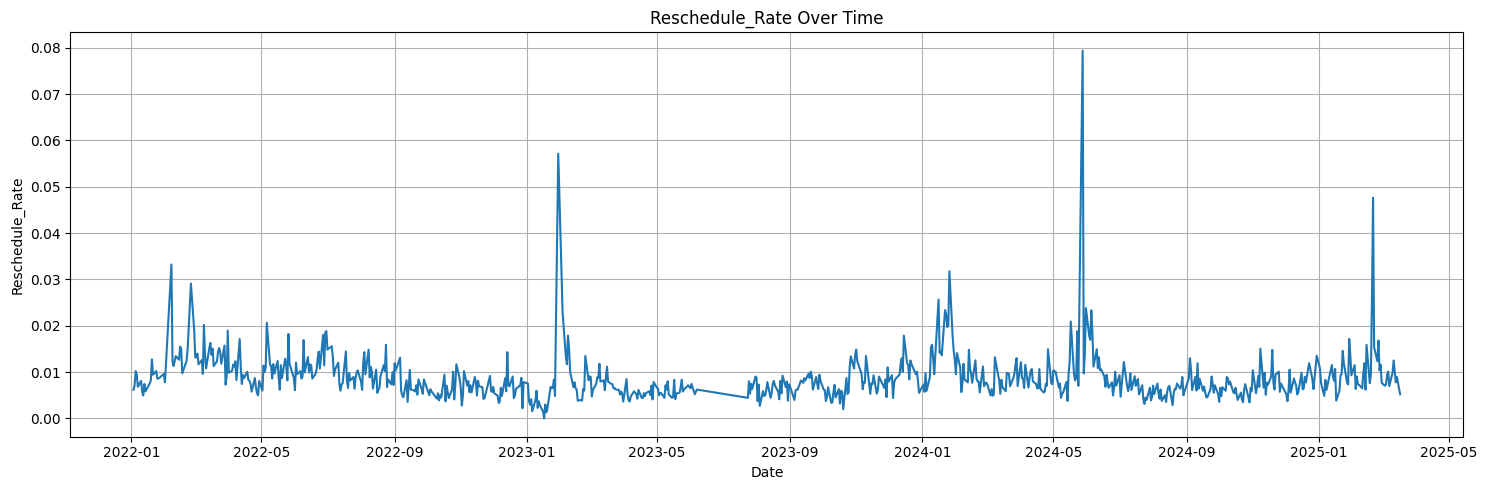

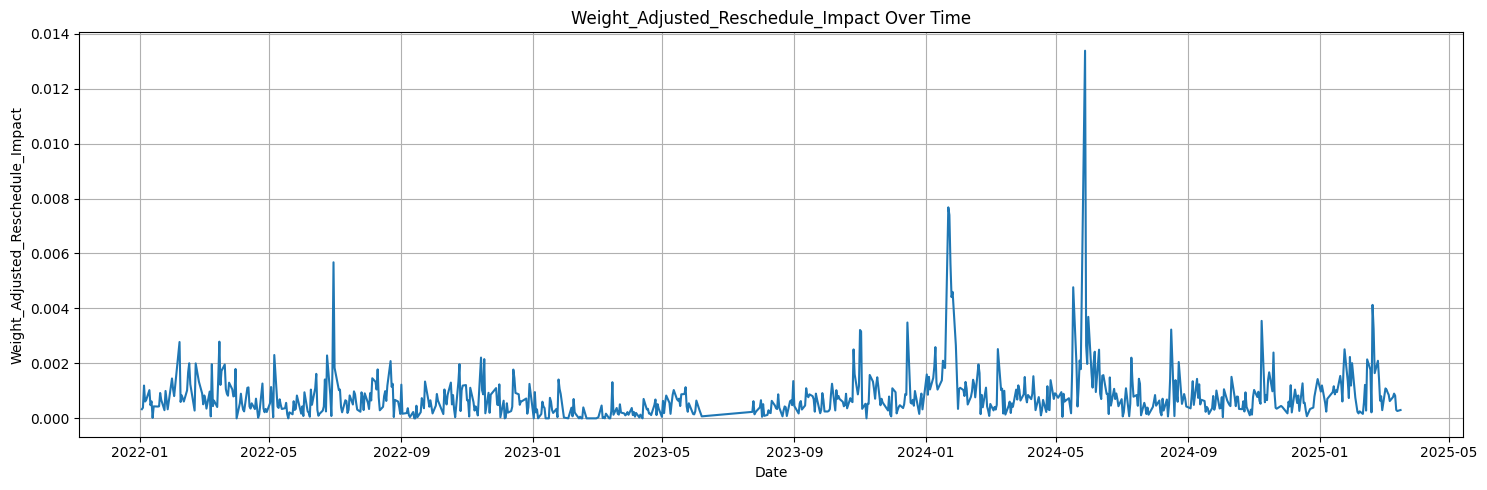

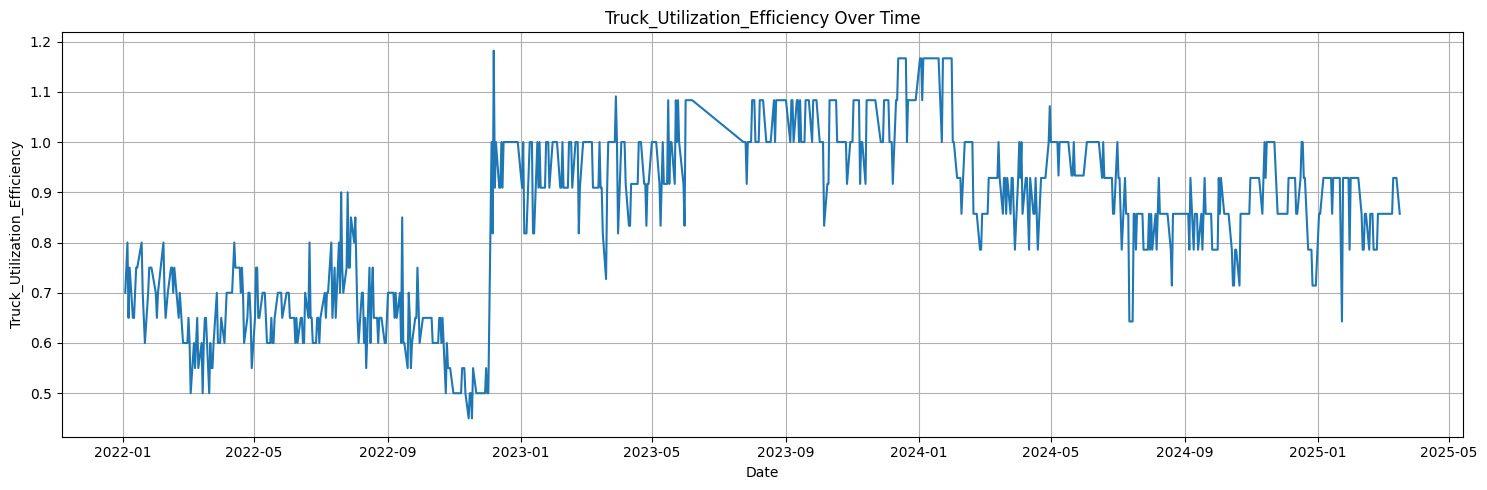

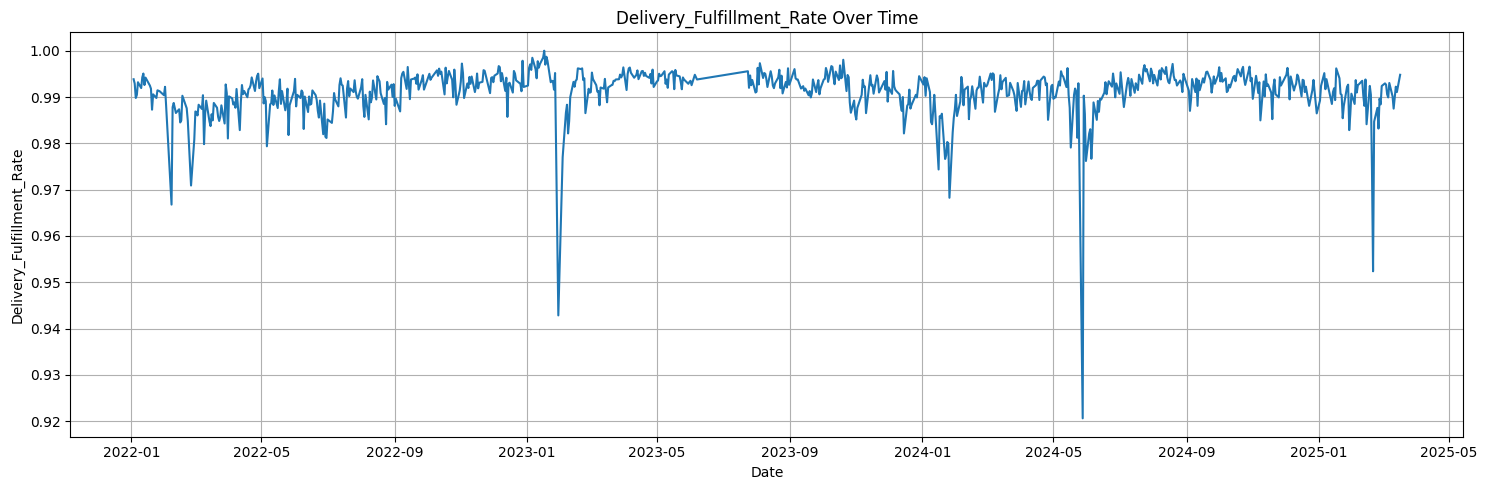

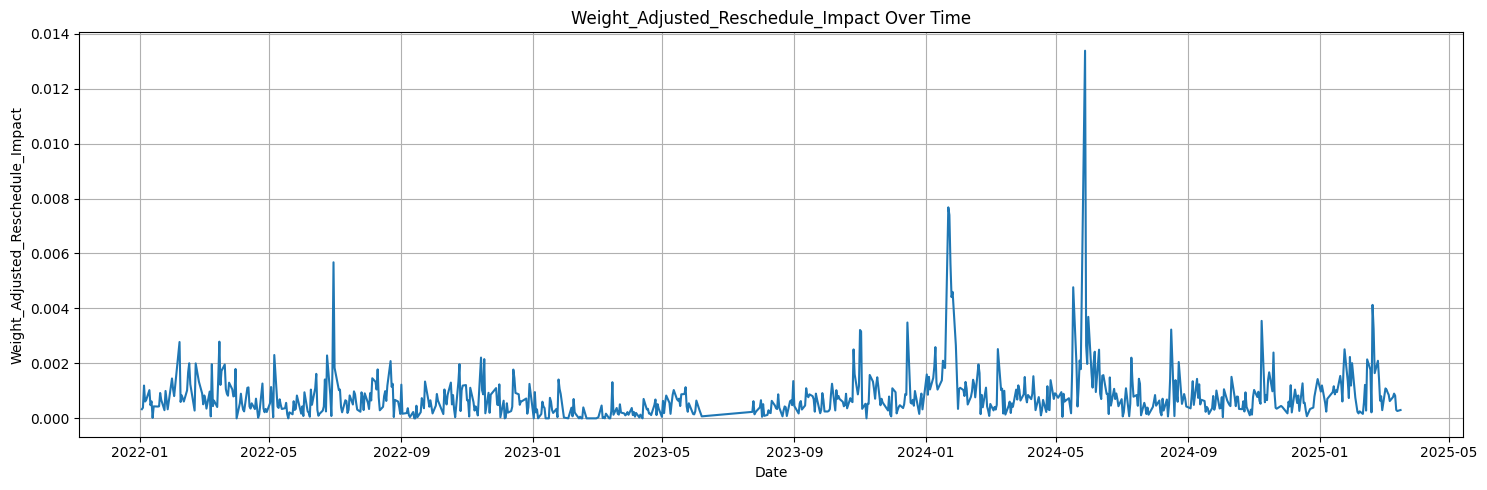

In [147]:
column_names = ['Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact']
for column in column_names:
    ut.plot_time_series(df, column_name=column, title=f'{column} Over Time', xlabel='Date', ylabel=column)

Seems like dependent variables are stable, visually looks like homoskedasticity, no need for log transforming for now.

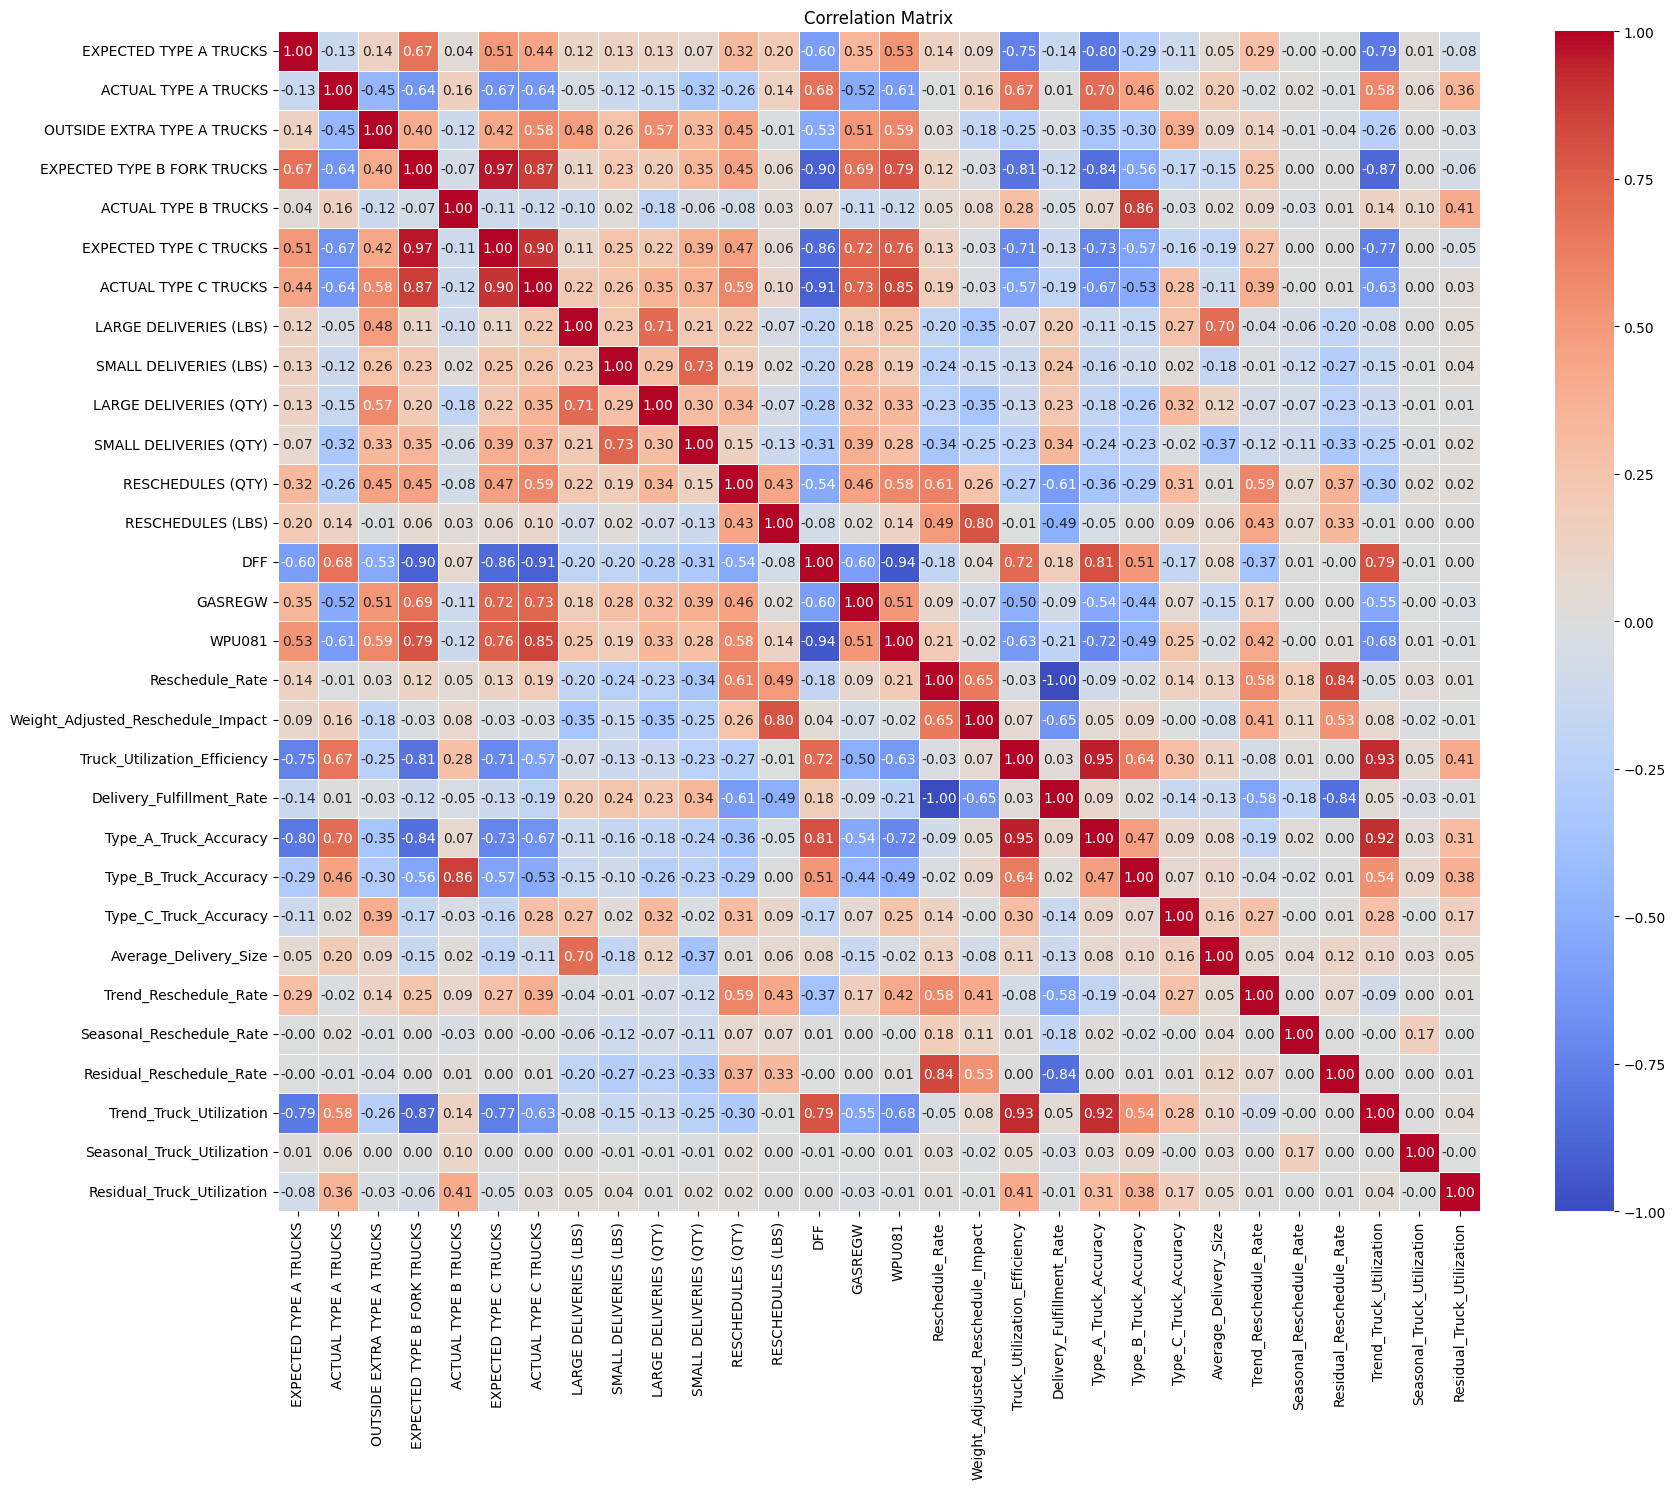

In [148]:
ut.plot_correlation_heatmap(df, method = 'pearson', columns=None, title='Correlation Matrix', figsize=(18, 15))

Let's move on to outlier detection

In [149]:
series_names = ['Reschedule_Rate', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'EXPECTED TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE A TRUCKS', 'ACTUAL TYPE B TRUCKS', 'ACTUAL TYPE C TRUCKS', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'WPU081', 'GASREGW', 'DFF']

for series in series_names:
    ut.identify_outliers_iqr(df[series], series_name = series, multiplier=1.5)

Identified 35 potential outliers for 'Reschedule_Rate' using IQR method (multiplier=1.5). Bounds: (-0.0004, 0.0165)
Identified 0 potential outliers for 'Truck_Utilization_Efficiency' using IQR method (multiplier=1.5). Bounds: (0.2857, 1.4286)
Identified 35 potential outliers for 'Delivery_Fulfillment_Rate' using IQR method (multiplier=1.5). Bounds: (0.9835, 1.0004)
Identified 40 potential outliers for 'Weight_Adjusted_Reschedule_Impact' using IQR method (multiplier=1.5). Bounds: (-0.0007, 0.0020)
Identified 15 potential outliers for 'RESCHEDULES (QTY)' using IQR method (multiplier=1.5). Bounds: (-0.5000, 11.5000)
Identified 22 potential outliers for 'RESCHEDULES (LBS)' using IQR method (multiplier=1.5). Bounds: (-9059.0000, 27113.0000)
Identified 0 potential outliers for 'EXPECTED TYPE A TRUCKS' using IQR method (multiplier=1.5). Bounds: (6.0000, 54.0000)
Identified 0 potential outliers for 'EXPECTED TYPE B FORK TRUCKS' using IQR method (multiplier=1.5). Bounds: (4.5000, 16.5000)
Ident

Identified 35 potential outliers for 'Reschedule_Rate' using IQR method (multiplier=1.5). Bounds: (-0.0004, 0.0165)


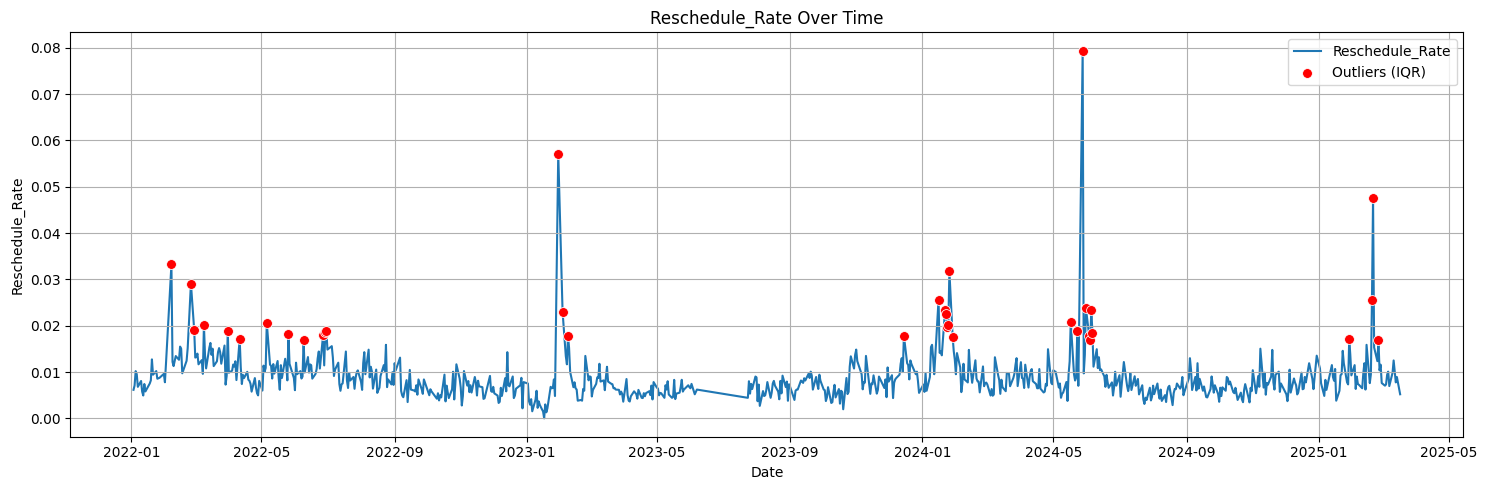

Identified 40 potential outliers for 'Weight_Adjusted_Reschedule_Impact' using IQR method (multiplier=1.5). Bounds: (-0.0007, 0.0020)


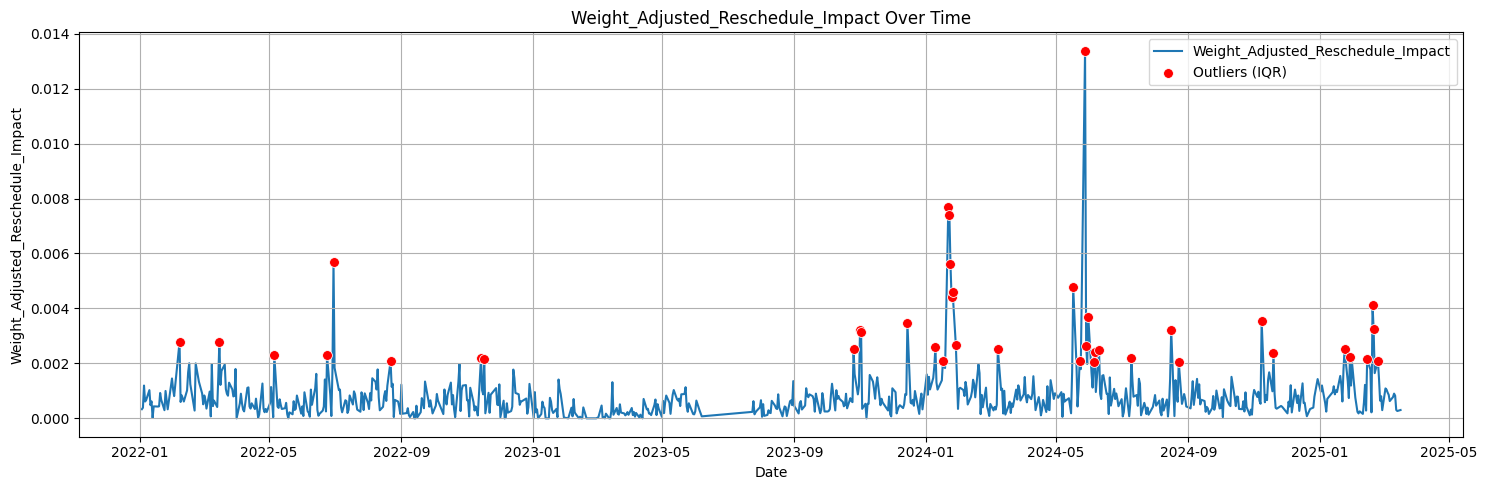

Identified 164 potential outliers for 'ACTUAL TYPE C TRUCKS' using IQR method (multiplier=1.5). Bounds: (-1.5000, 10.5000)


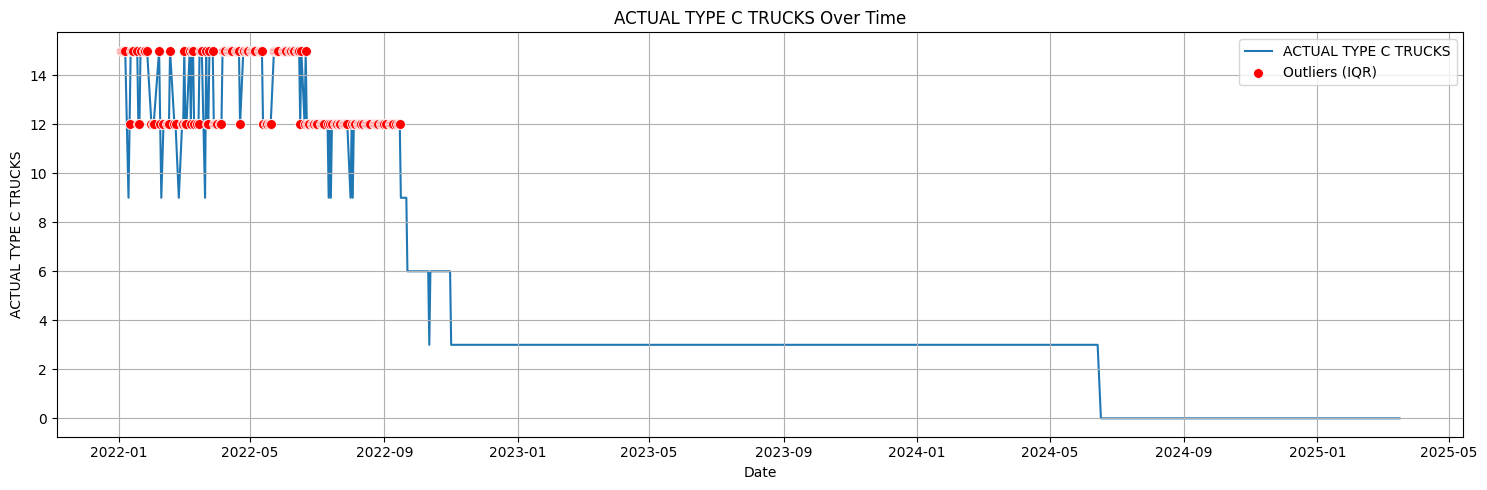

Identified 129 potential outliers for 'Type_C_Truck_Accuracy' using IQR method (multiplier=1.5). Bounds: (1.0000, 1.0000)


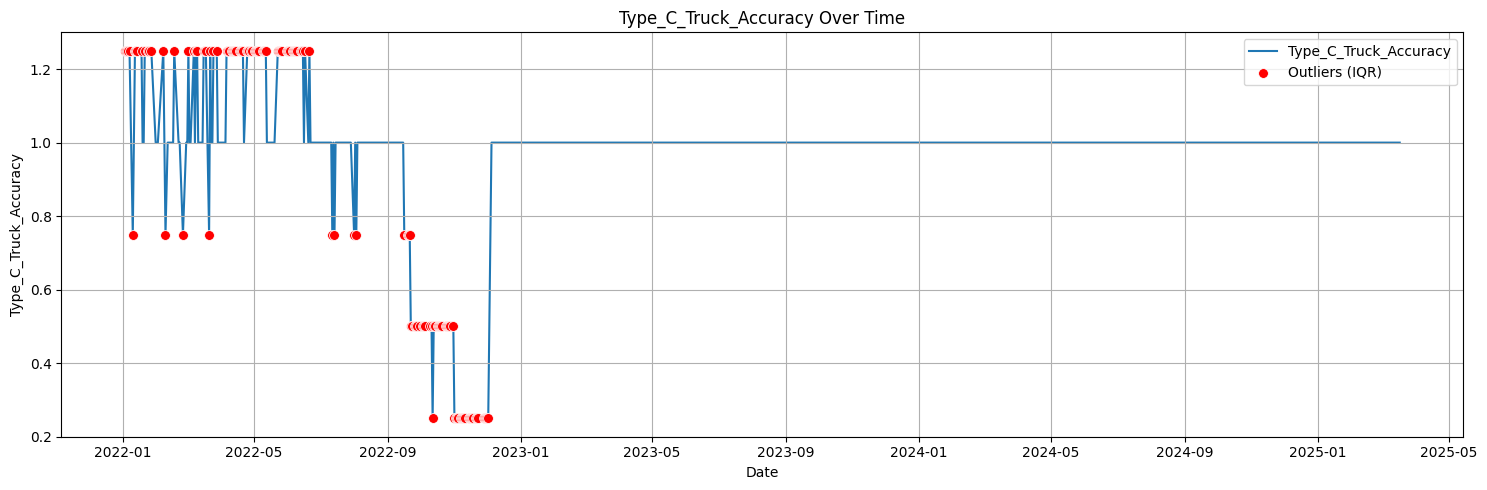

Identified 97 potential outliers for 'WPU081' using IQR method (multiplier=1.5). Bounds: (205.1370, 329.5850)


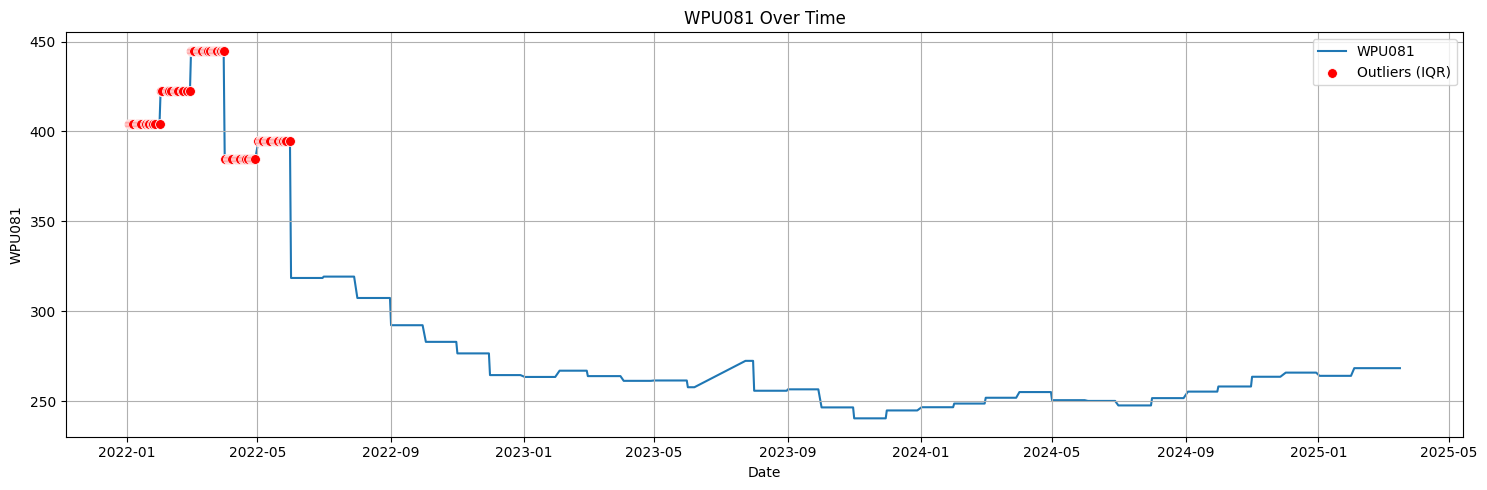

Identified 38 potential outliers for 'GASREGW' using IQR method (multiplier=1.5). Bounds: (2.4365, 4.5685)


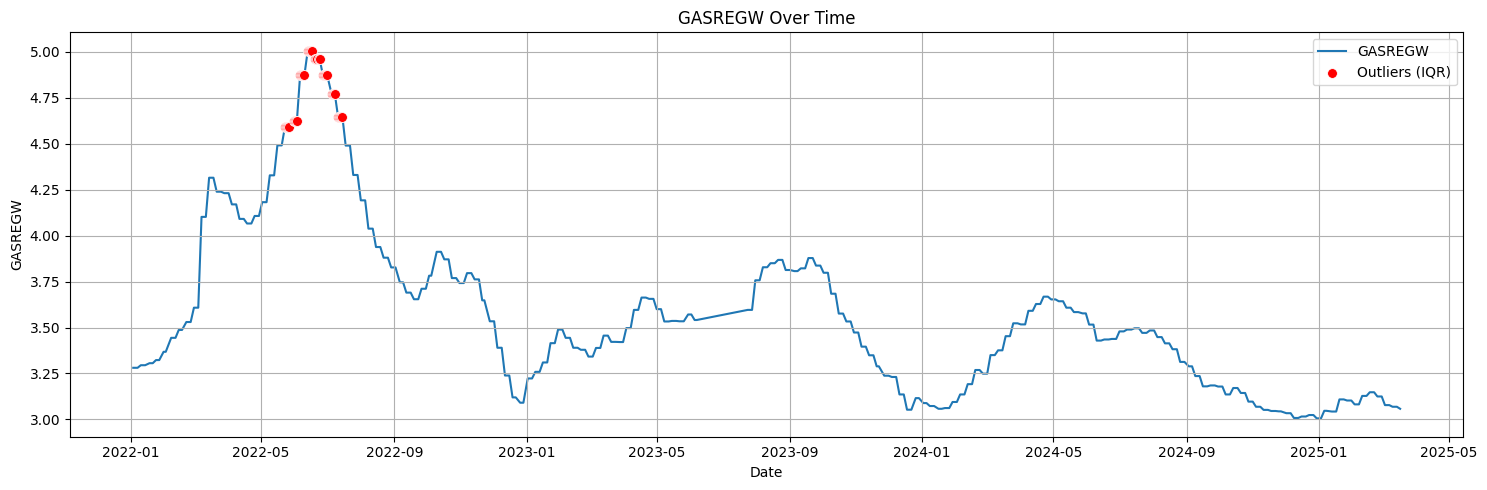

In [150]:
outlier_columns = ['Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'ACTUAL TYPE C TRUCKS', 'Type_C_Truck_Accuracy', 'WPU081', 'GASREGW']
for column in outlier_columns:
    ut.plot_series_with_outliers(df, column_name=column, title=f'{column} Over Time', xlabel='Date', ylabel=column)

So we decided to choose a few variables, and the results are quite interesting. Truck C's outliers, upon closer inspection on the dataframe itself, is just due to Truck C being phased out itself. Truck C needs to be on a close watch because it may not be reliable. 

As for reschedule impact, the metric itself is extremely low, indicating very low impact of rescheduling on the actual metric. This makes this metric not very worth looking at. Let's keep looking at rescheduling rate, because those reschedules could erode business trust and still be costly at the end of the day.

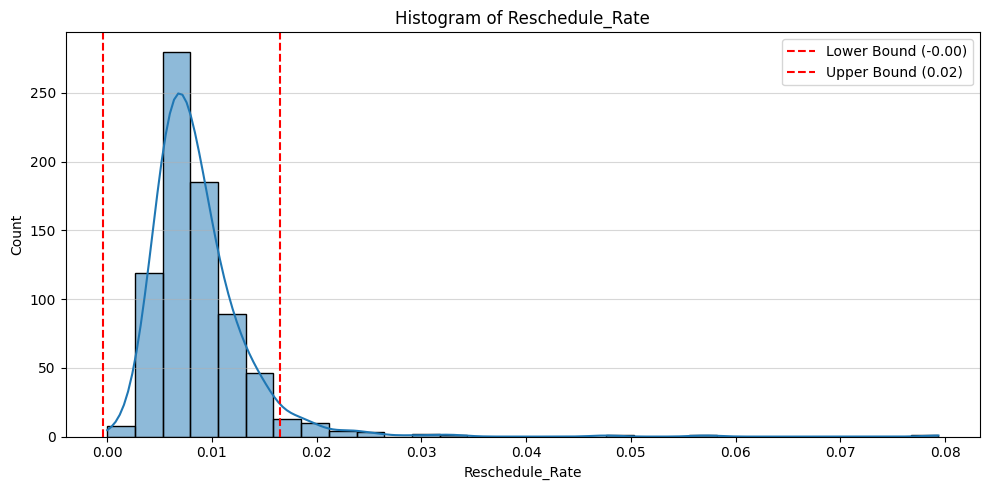

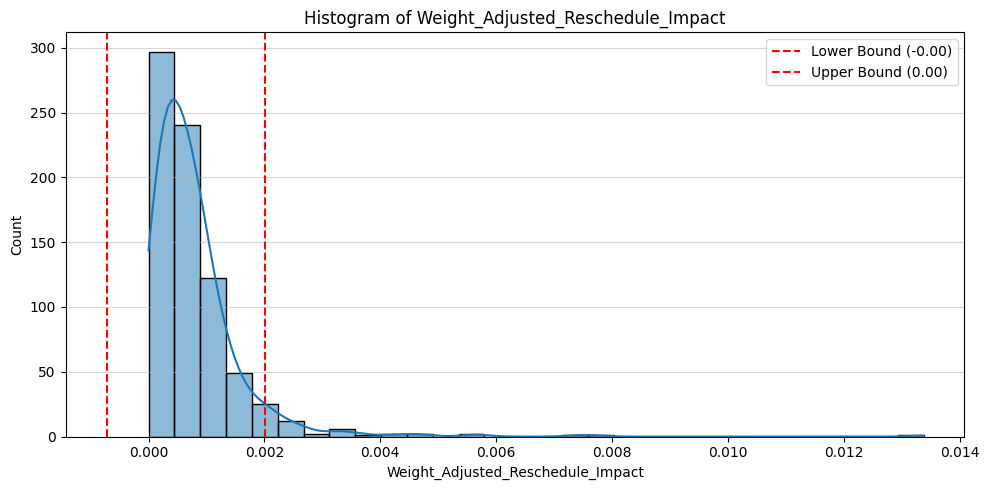

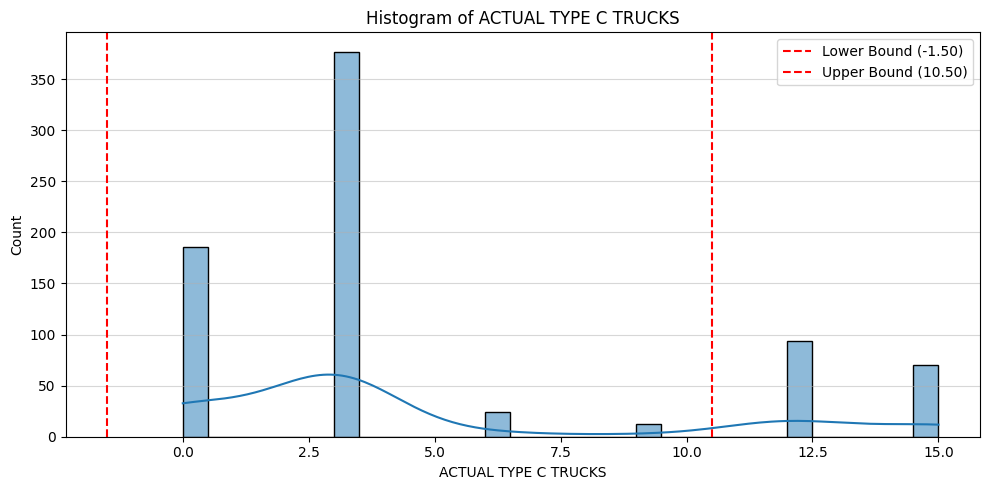

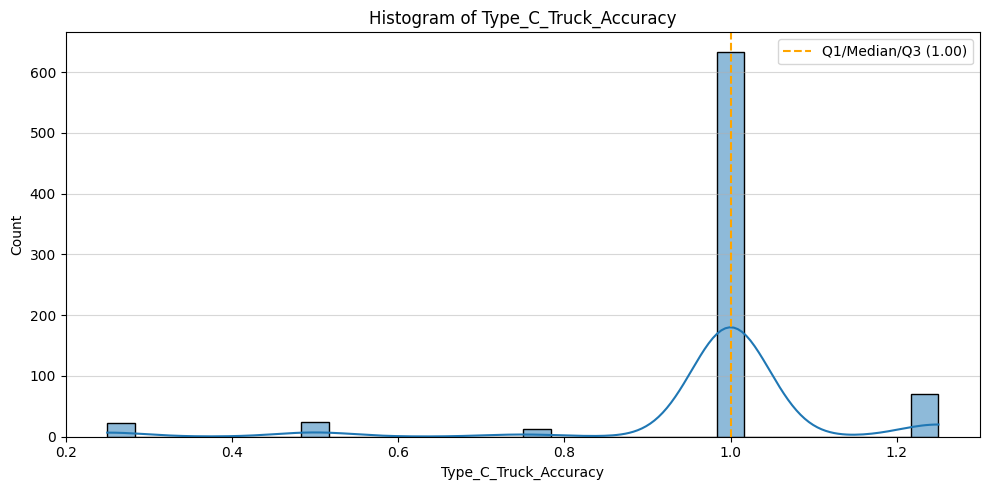

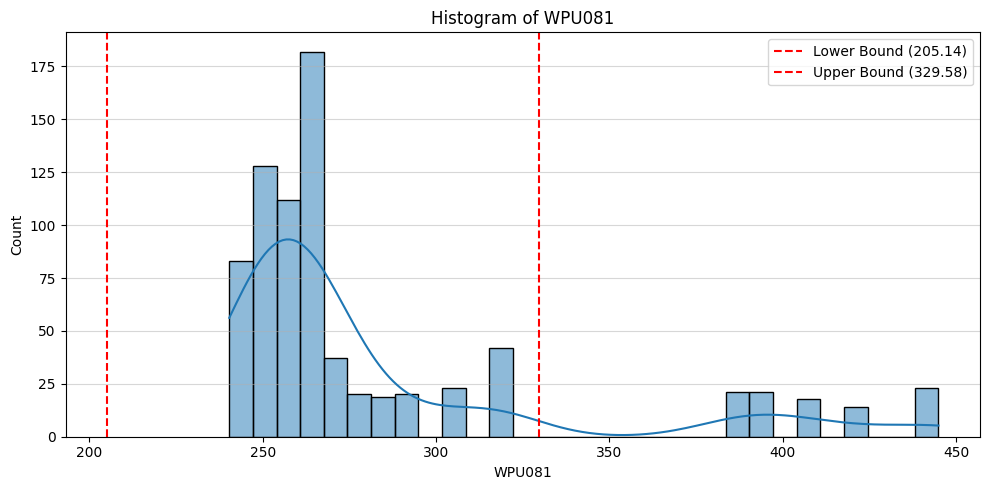

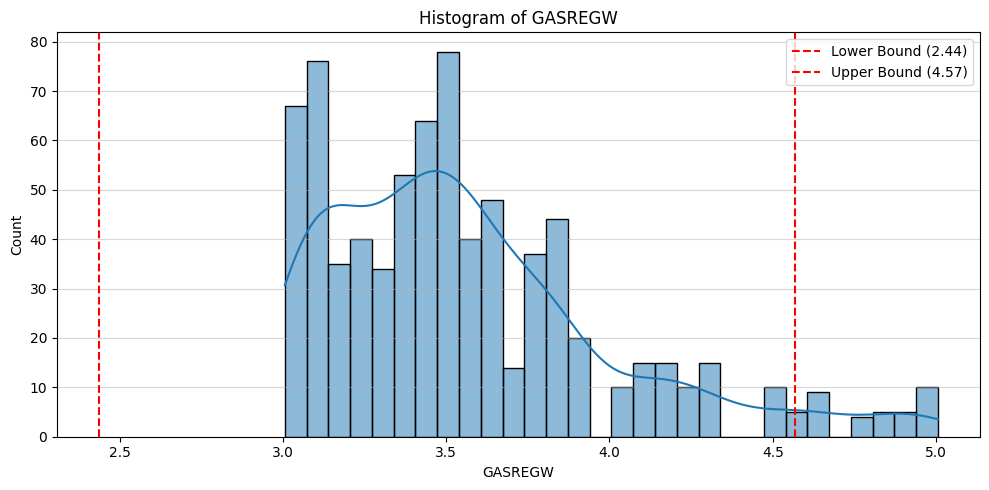

In [151]:
for col_name in outlier_columns: # Using 'col_name' for clarity
    ut.plot_histogram_with_outliers(df[col_name], series_name=col_name, multiplier=1.5, bins=30)

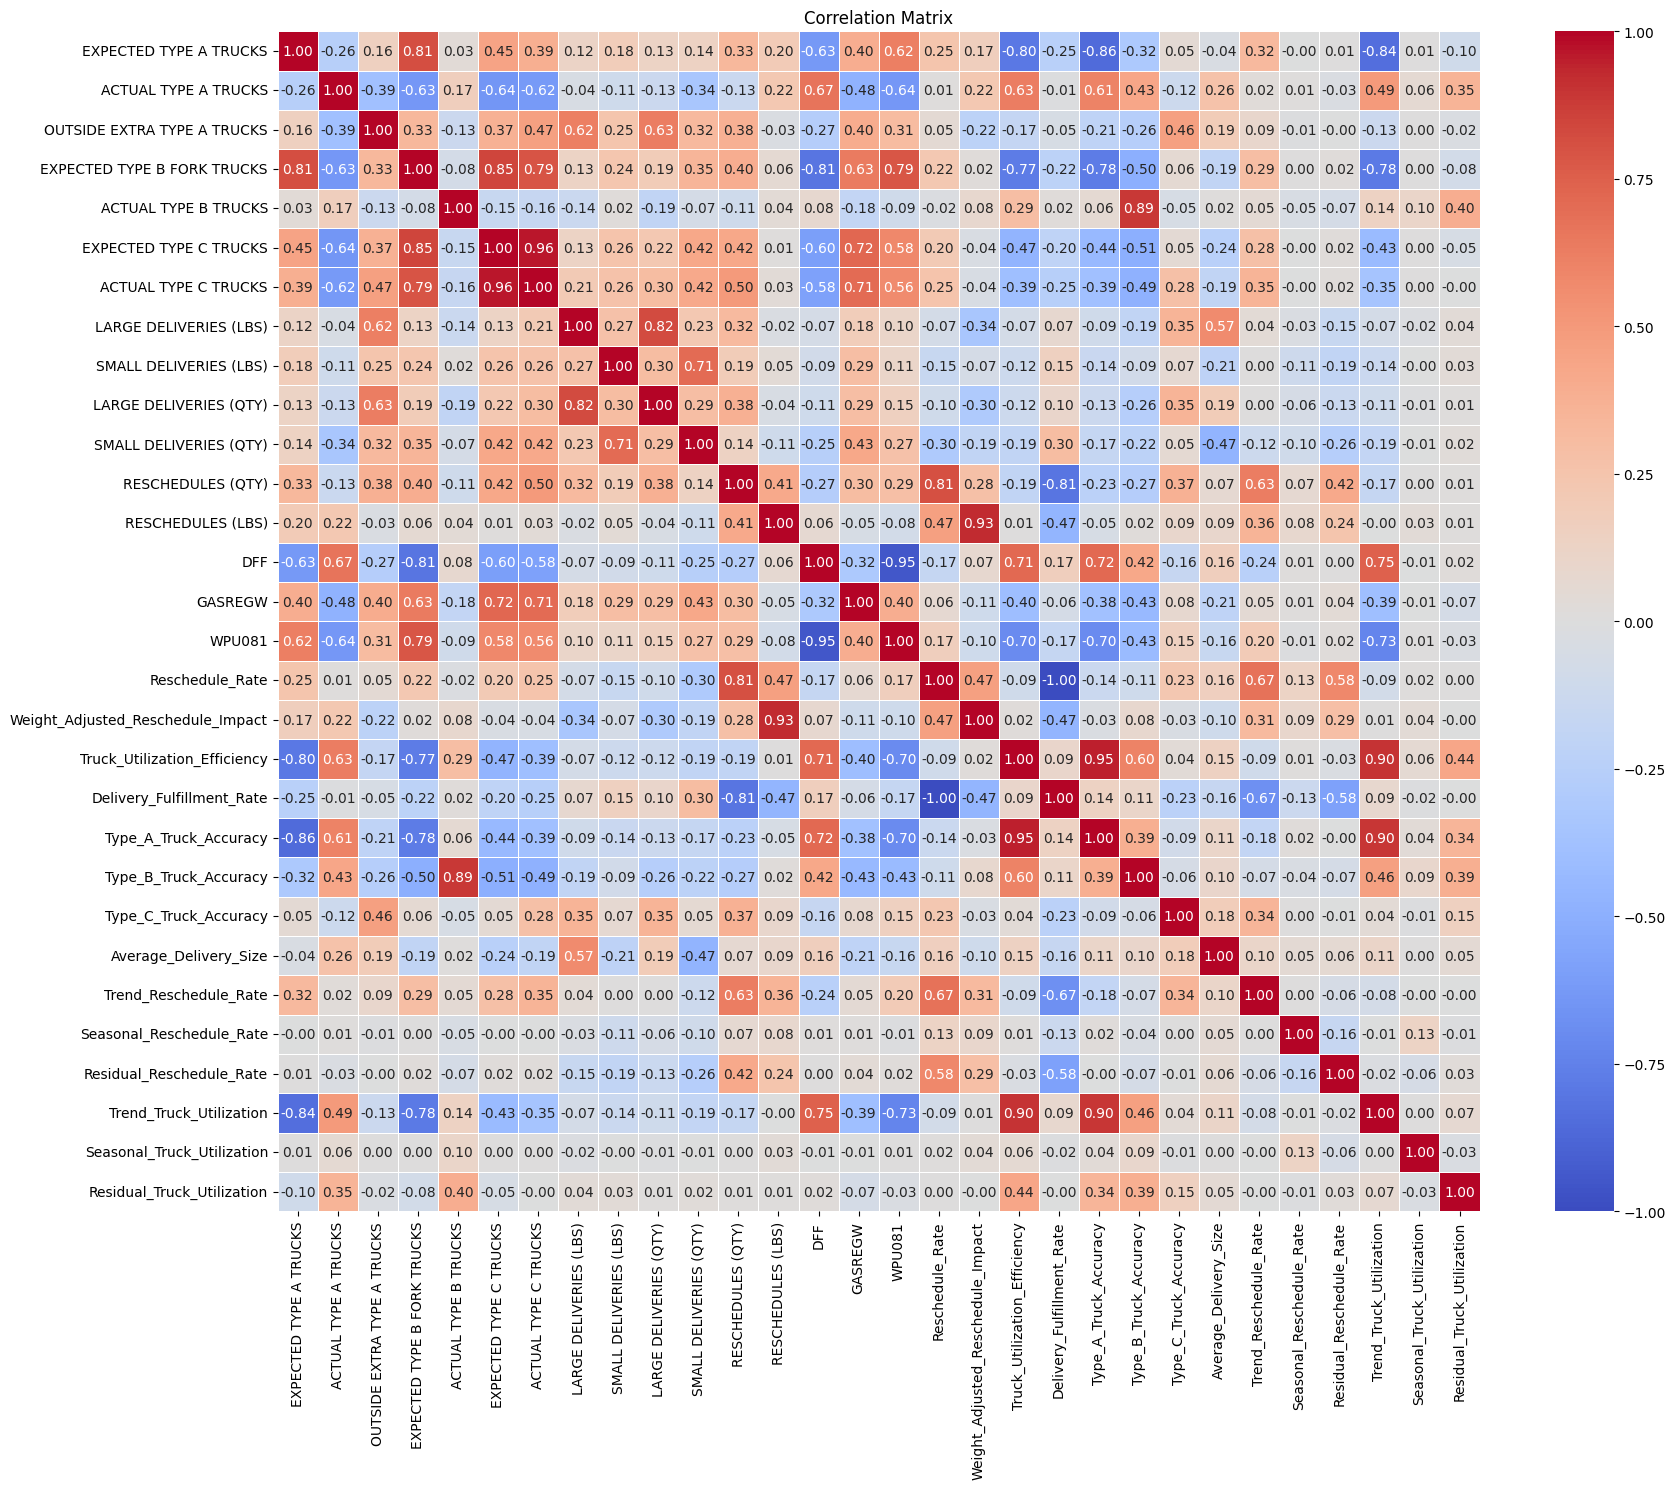

In [152]:
ut.plot_correlation_heatmap(df, method = 'spearman', columns=None, title='Correlation Matrix', figsize=(18, 15))

We know there's a lot of outliers and our data is a little weird. Here we try out spearman correlation, and we see that it's largely the same. Small deliveries are negatively correlated, meaning when there's more small deliveries, there tends to also be a lower reschedule rate. This would IMPLY that large deliveries are more prone to cancellations, but large deliveries are at -0.10, so it's a very very weak correlation. The more probable cause is that small deliveries reduce reschedule rate due to the amount of transactions being made and small deliveries having higher probability of going through.

We can consider a few predictors now(spearman):
Small Deliveries - -0.30
DFF - -0.17
WPU081 - 0.17
Actual Type C Trucks - 0.25
Trend Reschedule Rate - 0.67
Residual Reschedule Rate -0.58


Let's continue our EDA with stationarity analysis.

In [153]:
ut.run_stationarity_tests(df['Reschedule_Rate'], 'Reschedule_Rate')

--- Stationarity Tests for: Reschedule_Rate ---
ADF Test Results:
  ADF Statistic: -6.2136
  p-value: 0.0000
  Lags Used: 5
  Number of Observations: 757
  Critical Values:
	1%: -3.4390
	5%: -2.8654
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 0.2533
  p-value: 0.1000
  Lags Used: 15
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  Conclusion: Likely Stationary around constant (fail to reject H0 at 5% level)
---------------------------------------



Reschedule Rate is Stationary! Great.

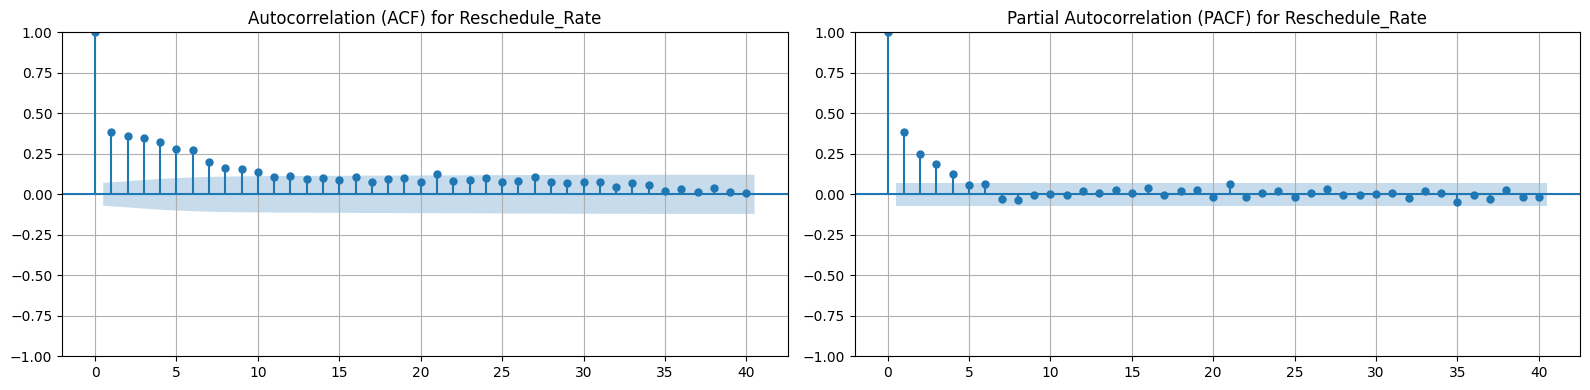

In [154]:
ut.plot_acf_pacf(df['Reschedule_Rate'], title_suffix='for Reschedule_Rate')

ACF (Left Plot)

Gradual Decay Pattern: The autocorrelation shows significant positive values that slowly decrease across multiple lags (roughly 10-12 periods)
This gradual decay suggests "memory." Reschedule rates in one period influence rates for several periods afterward

PACF (Right Plot)

Sharp Cutoff After Lag 4: There are significant spikes at lags 1-4, then values fall within the significance bands
This pattern is characteristic of an AR(4) process - the reschedule rate is directly influenced by its values from the previous 4 time periods, but not by earlier periods directly

Let's test stationarity on everything else now.

We can consider a few predictors now(spearman):
Small Deliveries - -0.30
DFF - -0.17
WPU081 - 0.17
Actual Type C Trucks - 0.25
Trend Reschedule Rate - 0.67
Residual Reschedule Rate -0.58

In [155]:
# Stationarity Test for the selected predictors
for col_name in df.columns[1:]:  # Skip the first column (Date) for stationarity tests
    ut.run_stationarity_tests(df[col_name], col_name)

--- Stationarity Tests for: ACTUAL TYPE A TRUCKS ---
ADF Test Results:
  ADF Statistic: -2.0357
  p-value: 0.2711
  Lags Used: 13
  Number of Observations: 749
  Critical Values:
	1%: -3.4391
	5%: -2.8654
	10%: -2.5688
  Conclusion: Likely Non-Stationary (fail to reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 3.4135
  p-value: 0.0100
  Lags Used: 17
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  KPSS Statistic: 3.4135
  p-value: 0.0100
  Lags Used: 17
  Critical Values:
  Conclusion: Likely Non-Stationary around trend too (reject H0 at 5% level)
---------------------------------------

--- Stationarity Tests for: OUTSIDE EXTRA TYPE A TRUCKS ---
ADF Test Results:
  ADF Statistic: -2.4494
  p-value: 0.1283
  Lags Used: 9
  Number of Observations: 753
  Critical Values:
	1%: -3.4391
	5%: -2.8654
	10%: -2.5688
  Conclusion: Likely Non-Stationary (fail to reject H0 at 5% level)

---
KPSS Test Results (stationarity aro

In [156]:
# List of variables to difference
variables_to_difference = [
    'ACTUAL TYPE A TRUCKS', 'OUTSIDE EXTRA TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS',
    'EXPECTED TYPE C TRUCKS', 'SMALL DELIVERIES (LBS)', 'LARGE DELIVERIES (QTY)',
    'SMALL DELIVERIES (QTY)', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'GASREGW',
    'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency',
    'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Average_Delivery_Size',
    'Trend_Truck_Utilization'
]

# Difference the variables and replace the original columns
for var in variables_to_difference:
    diff_col_name = f"{var}_diff"
    df[diff_col_name] = df[var].diff()
    df.drop(columns=[var], inplace=True)
    df.rename(columns={diff_col_name: var}, inplace=True)


In [157]:
# Create differenced versions of the non-stationary variables
df['DFF_diff'] = df['DFF'].diff()
df['WPU081_diff'] = df['WPU081'].diff()
df['ACTUAL_TYPE_C_TRUCKS_diff'] = df['ACTUAL TYPE C TRUCKS'].diff()

# Replace the original columns with their differenced versions
df.drop(columns=['DFF', 'WPU081', 'ACTUAL TYPE C TRUCKS'], inplace=True)


Now we can use these differenced variables in regression models, let's just double check for stationarity just to make sure.

In [158]:
Differenced_Col = ['DFF_diff', 'WPU081_diff', 'ACTUAL_TYPE_C_TRUCKS_diff'] + variables_to_difference
for col_name in Differenced_Col:
    ut.run_stationarity_tests(df[col_name], col_name)

--- Stationarity Tests for: DFF_diff ---
ADF Test Results:
  ADF Statistic: -27.8056
  p-value: 0.0000
  Lags Used: 0
  Number of Observations: 761
  Critical Values:
	1%: -3.4390
	5%: -2.8653
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 1.3124
  p-value: 0.0100
  Lags Used: 2
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  KPSS Statistic: 1.3124
  p-value: 0.0100
  Lags Used: 2
  Critical Values:
  Conclusion: Likely Non-Stationary around trend too (reject H0 at 5% level)
---------------------------------------

--- Stationarity Tests for: WPU081_diff ---
ADF Test Results:
  ADF Statistic: -27.6063
  p-value: 0.0000
  Lags Used: 0
  Number of Observations: 761
  Critical Values:
	1%: -3.4390
	5%: -2.8653
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 0.3548
  p-value: 0.

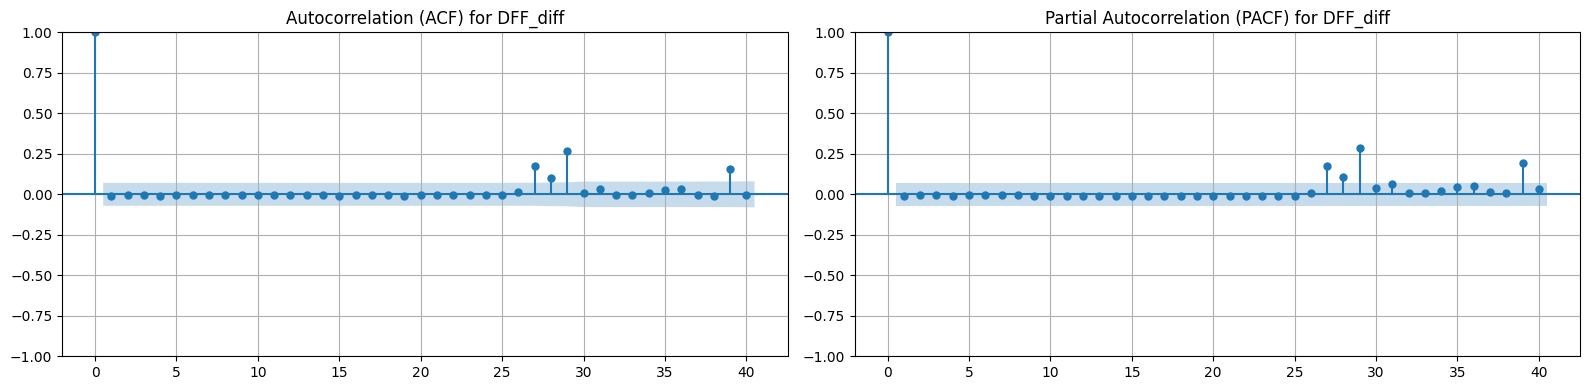

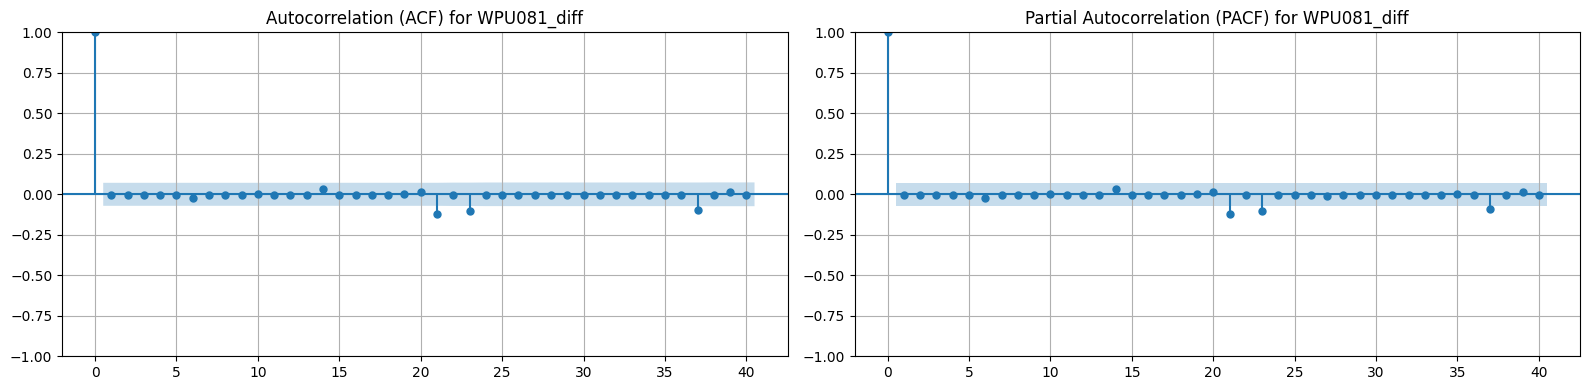

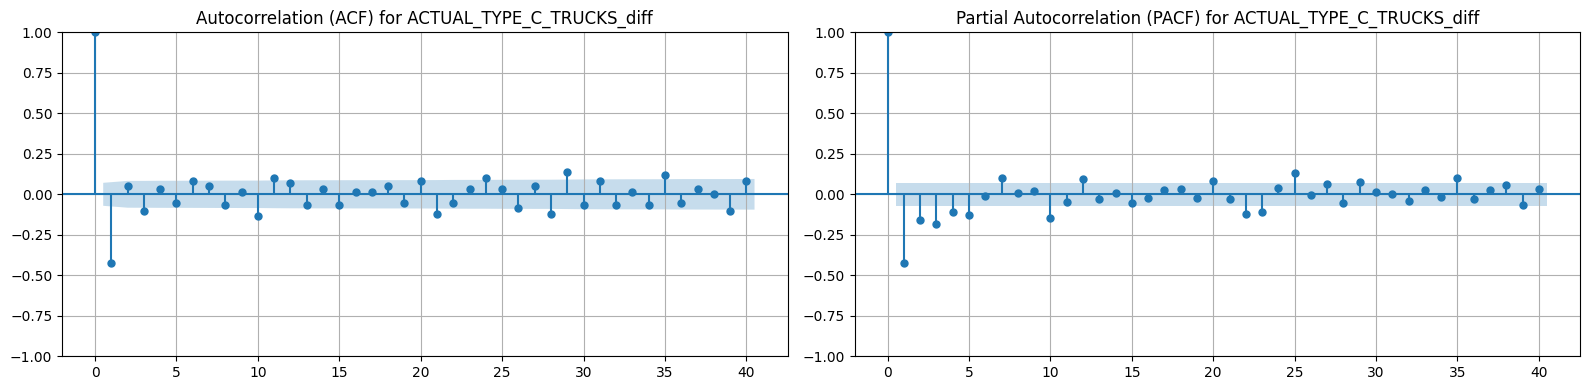

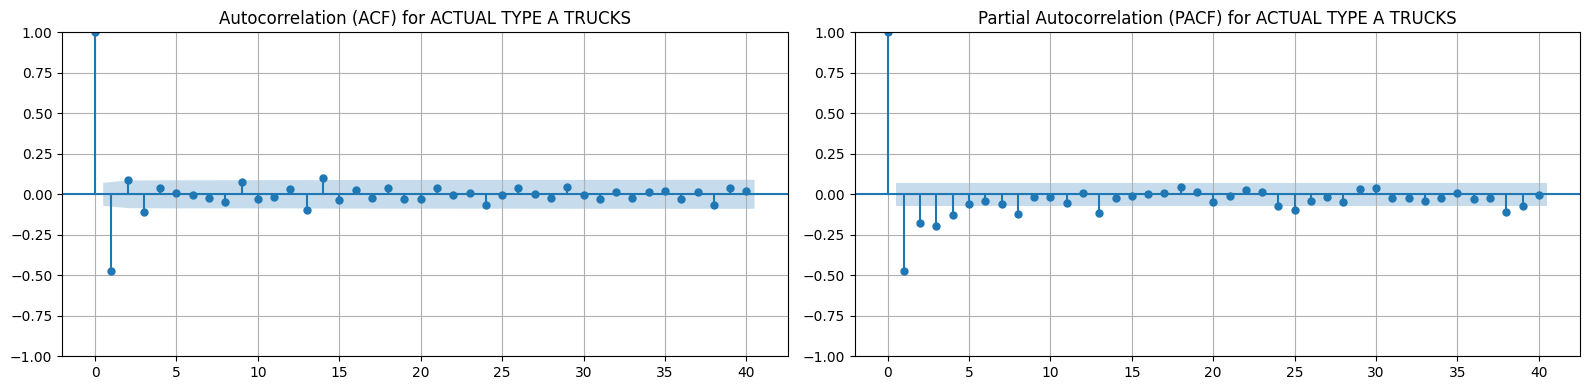

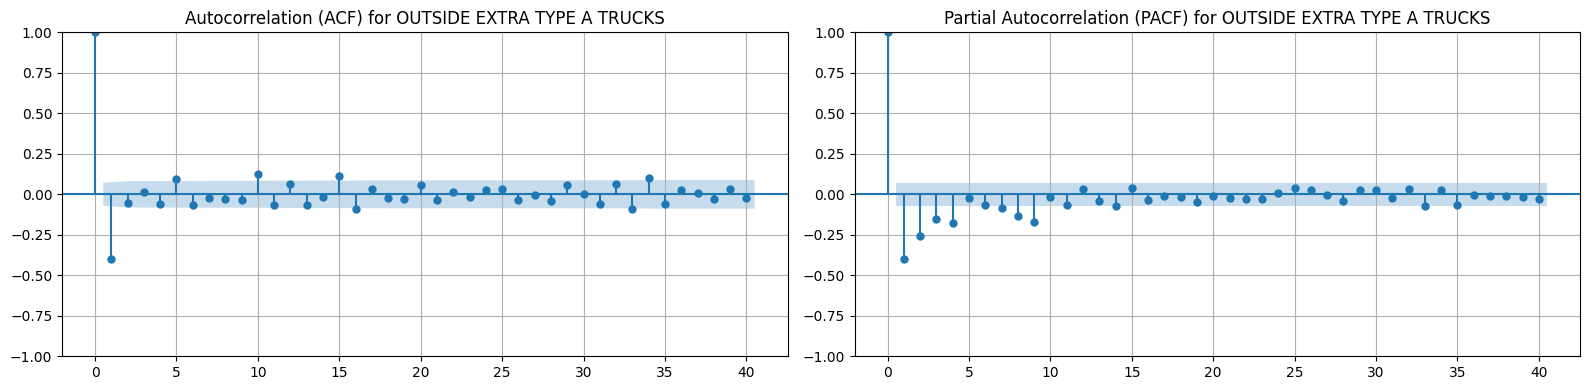

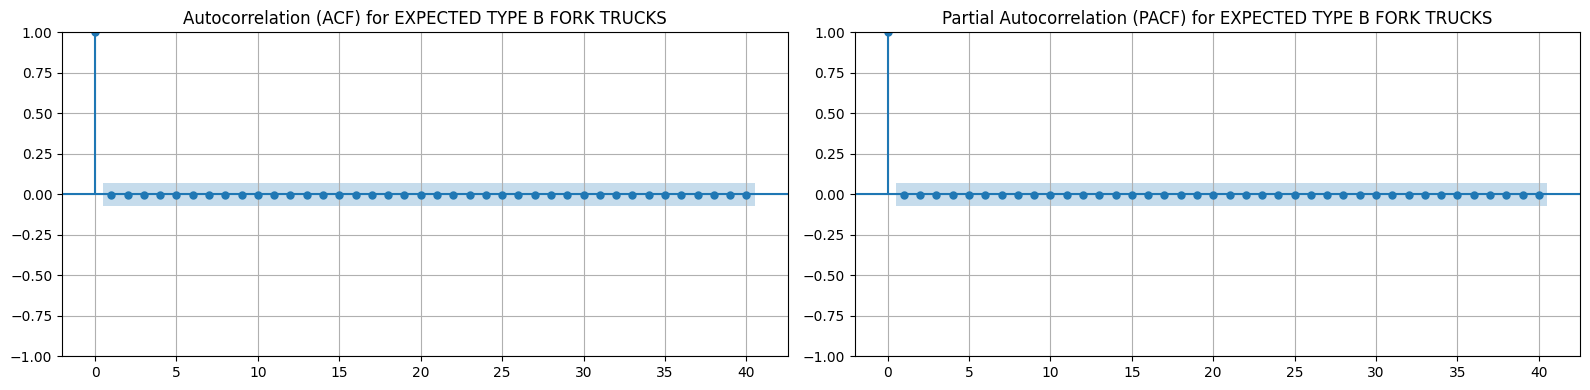

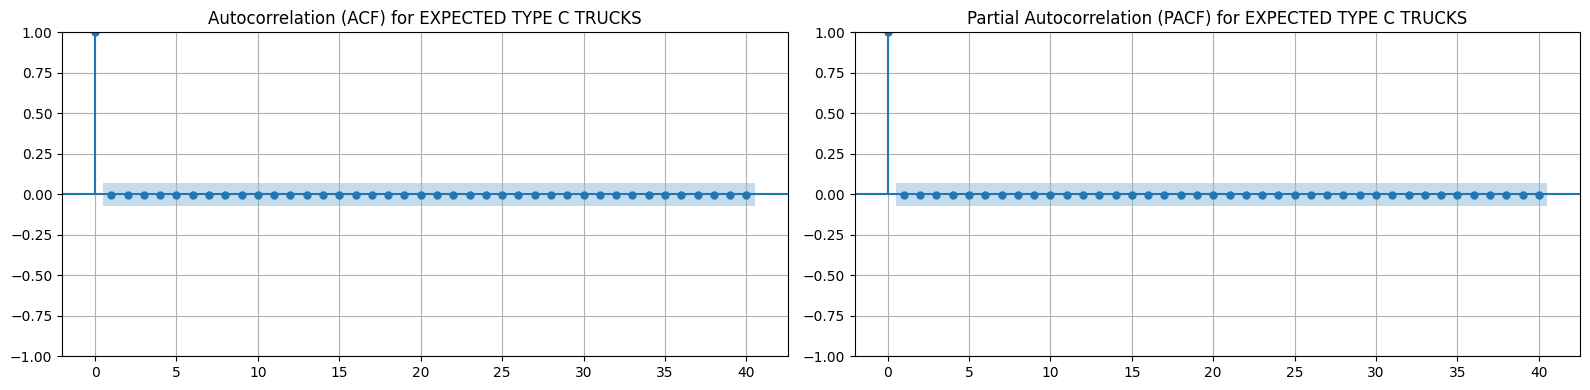

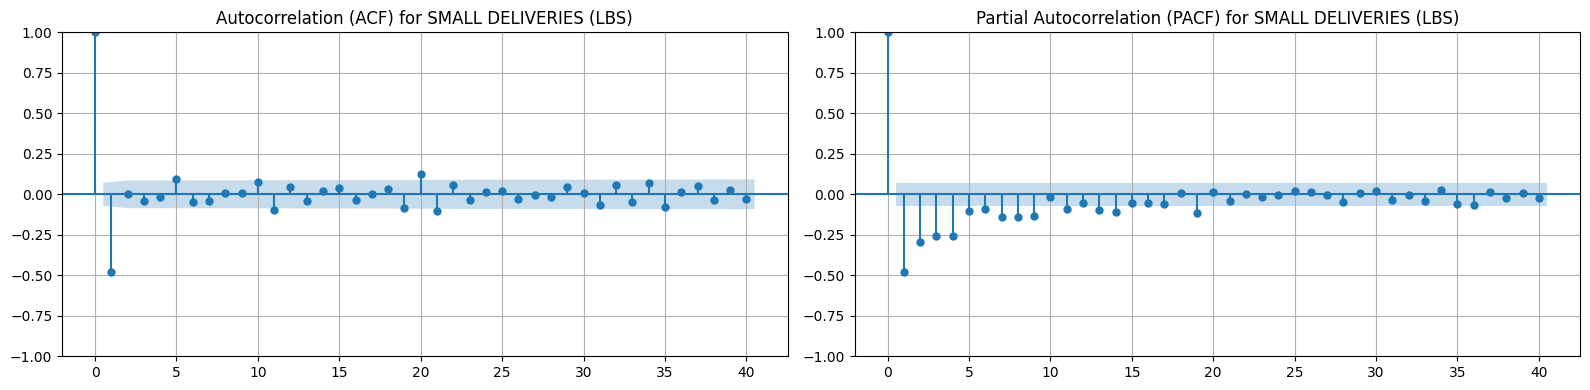

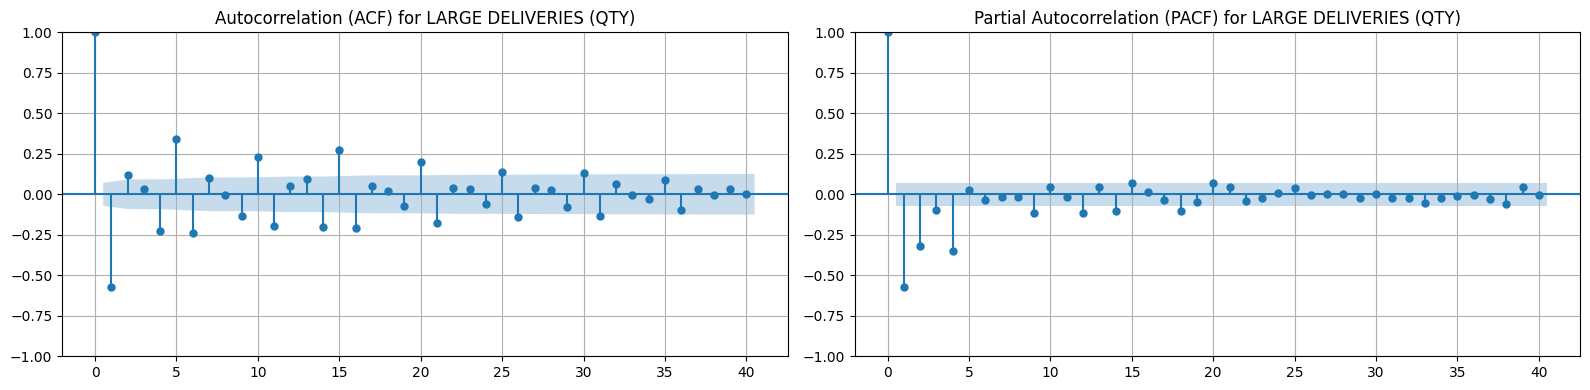

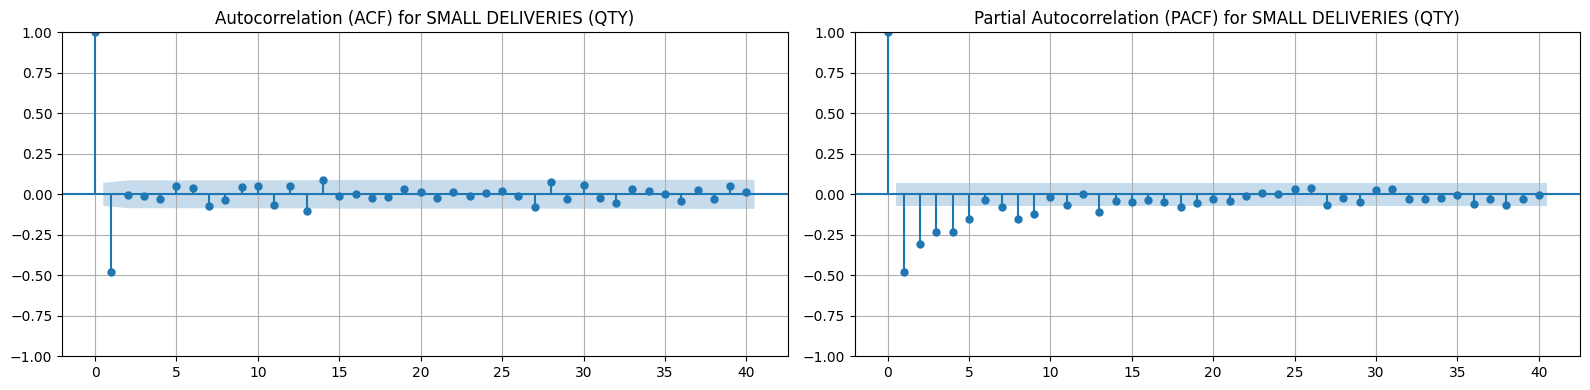

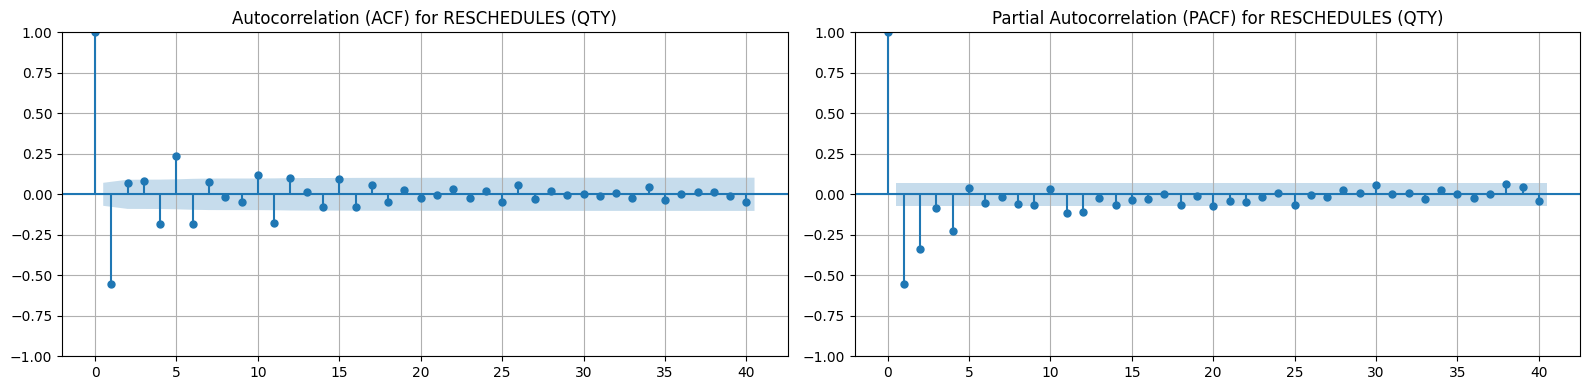

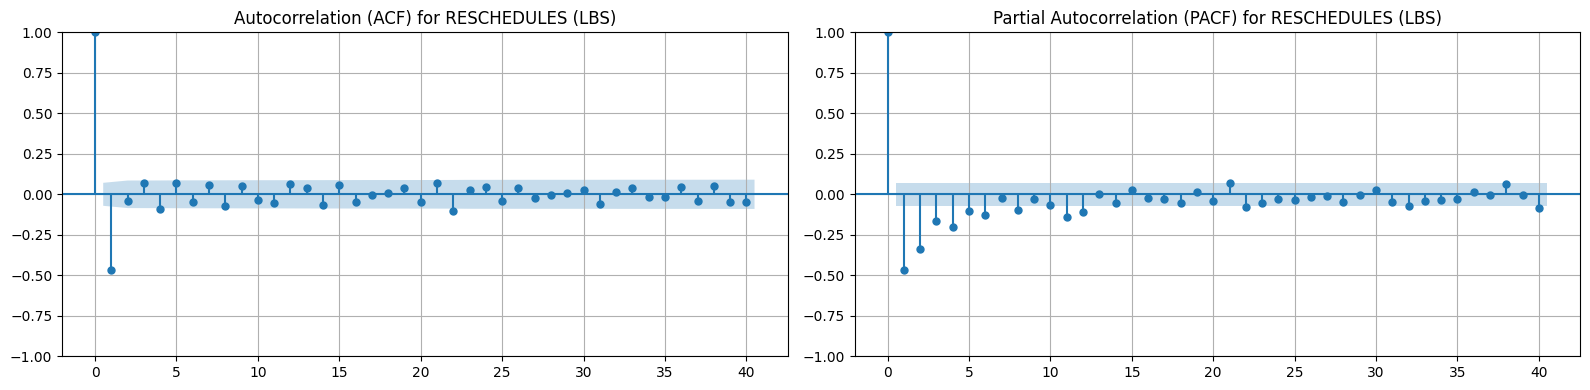

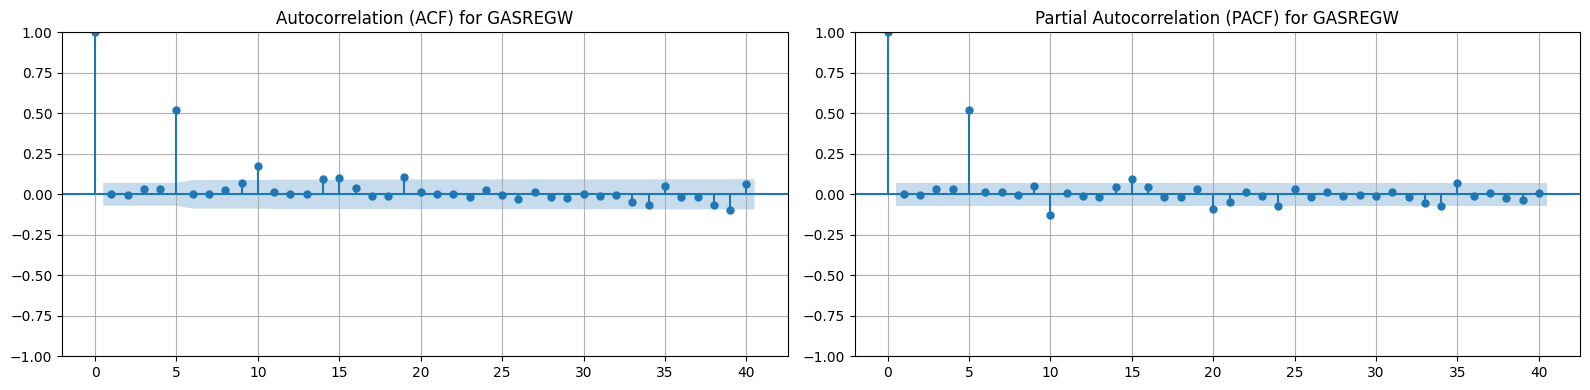

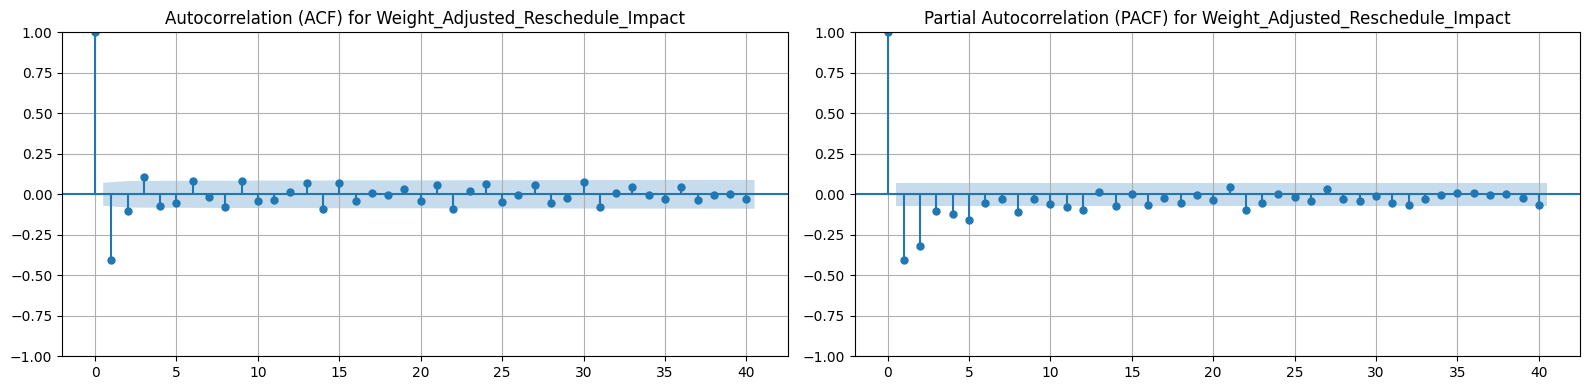

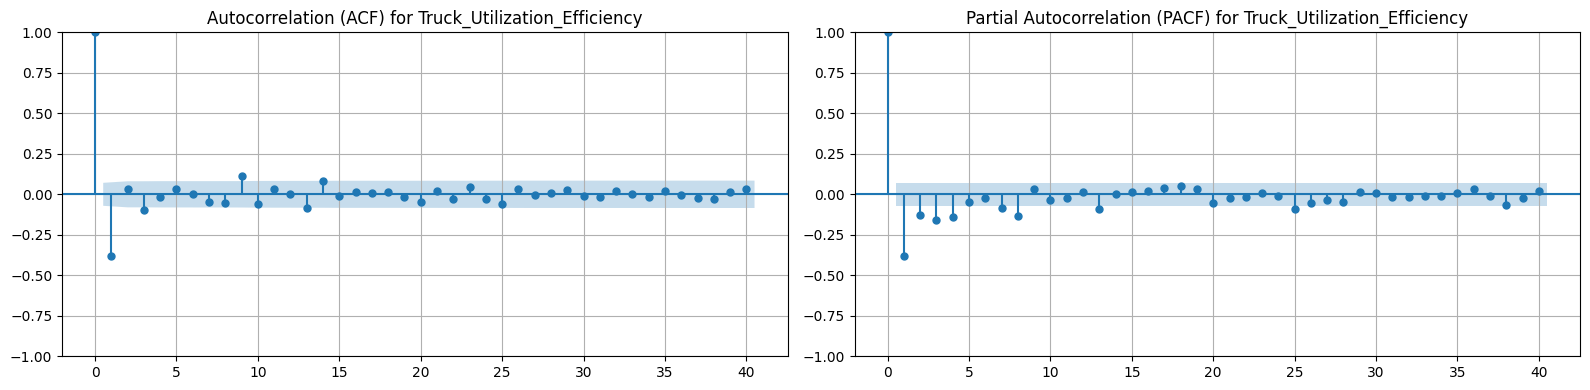

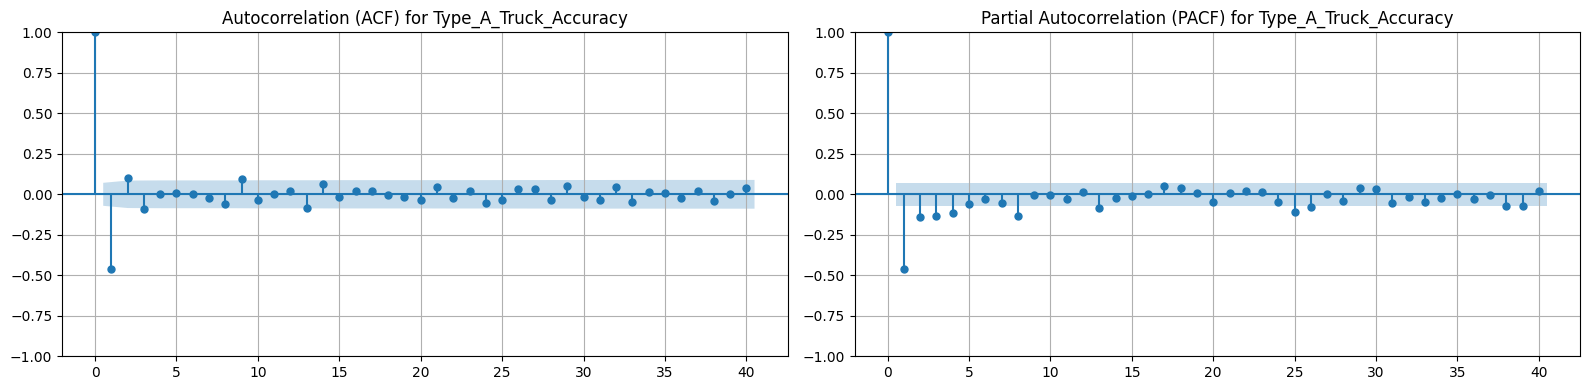

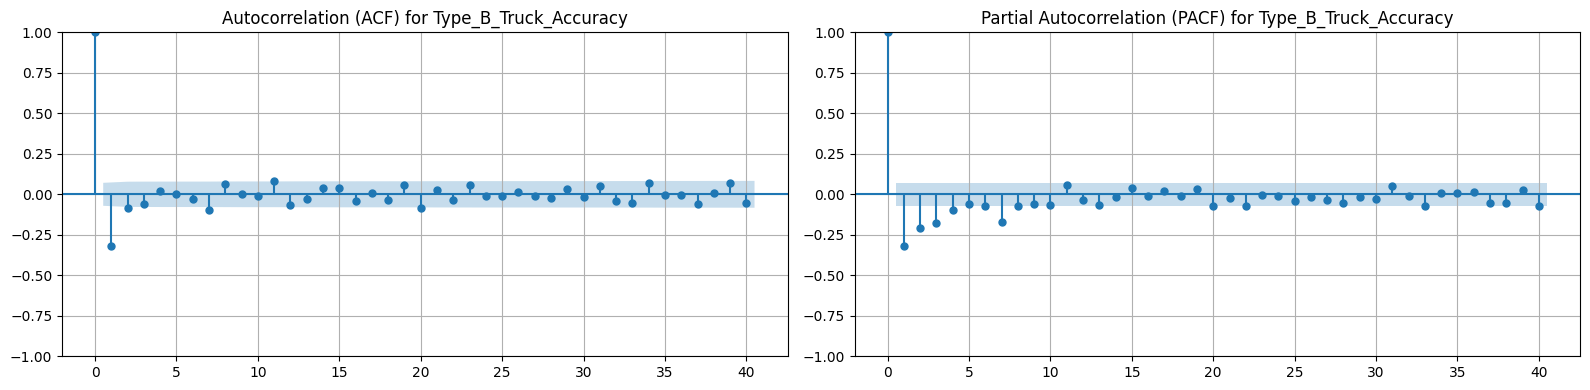

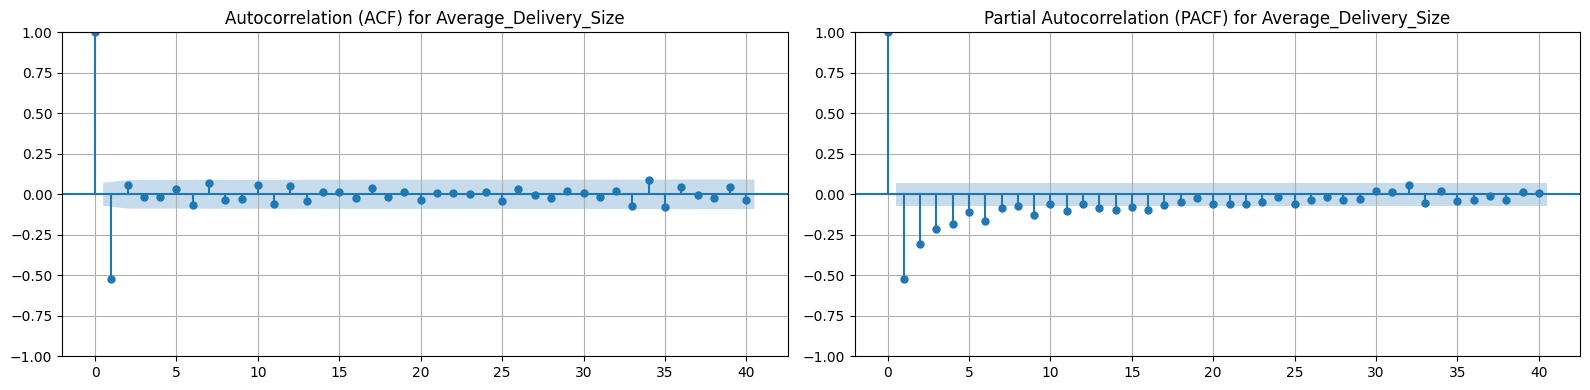

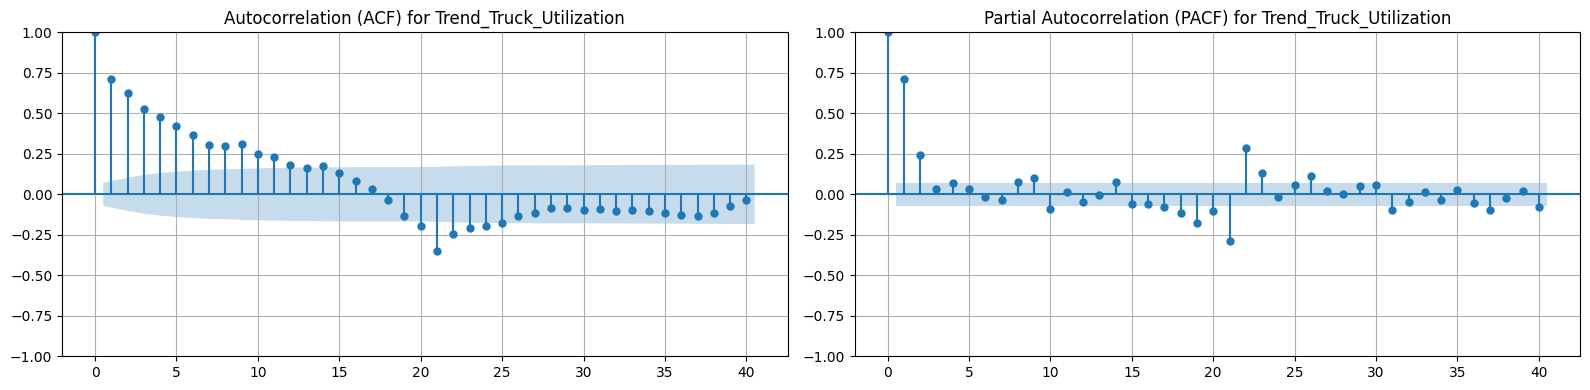

In [159]:
# Plot ACF and PACF for differenced series
for col_name in Differenced_Col:
    ut.plot_acf_pacf(df[col_name], title_suffix=f'for {col_name}')

In [160]:
# Create Lags Based on PACF and ACF results

# Reschedule_Rate -> 4 Lags
df['Reschedule_Rate_lag1'] = df['Reschedule_Rate'].shift(1)
df['Reschedule_Rate_lag2'] = df['Reschedule_Rate'].shift(2)
df['Reschedule_Rate_lag3'] = df['Reschedule_Rate'].shift(3)
df['Reschedule_Rate_lag4'] = df['Reschedule_Rate'].shift(4)


# ACTUAL_TYPE_C_TRUCKS_diff -> 5 Lags
df['ACTUAL_TYPE_C_TRUCKS_diff_lag1'] = df['ACTUAL_TYPE_C_TRUCKS_diff'].shift(1)
df['ACTUAL_TYPE_C_TRUCKS_diff_lag2'] = df['ACTUAL_TYPE_C_TRUCKS_diff'].shift(2)
df['ACTUAL_TYPE_C_TRUCKS_diff_lag3'] = df['ACTUAL_TYPE_C_TRUCKS_diff'].shift(3)
df['ACTUAL_TYPE_C_TRUCKS_diff_lag4'] = df['ACTUAL_TYPE_C_TRUCKS_diff'].shift(4)
df['ACTUAL_TYPE_C_TRUCKS_diff_lag5'] = df['ACTUAL_TYPE_C_TRUCKS_diff'].shift(5)

# ACTUAL TYPE A TRUCKS -> 4 Lags
df['ACTUAL TYPE A TRUCKS_lag1'] = df['ACTUAL TYPE A TRUCKS'].shift(1)
df['ACTUAL TYPE A TRUCKS_lag2'] = df['ACTUAL TYPE A TRUCKS'].shift(2)
df['ACTUAL TYPE A TRUCKS_lag3'] = df['ACTUAL TYPE A TRUCKS'].shift(3)
df['ACTUAL TYPE A TRUCKS_lag4'] = df['ACTUAL TYPE A TRUCKS'].shift(4)

# OUTSIDE EXTRA TYPE A TRUCKS -> 9 Lags
df['OUTSIDE EXTRA TYPE A TRUCKS_lag1'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(1)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag2'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(2)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag3'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(3)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag4'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(4)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag5'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(5)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag6'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(6)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag7'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(7)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag8'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(8)
df['OUTSIDE EXTRA TYPE A TRUCKS_lag9'] = df['OUTSIDE EXTRA TYPE A TRUCKS'].shift(9)

# SMALL DELIVERIES (LBS) -> 9 Lags
df['SMALL DELIVERIES (LBS)_lag1'] = df['SMALL DELIVERIES (LBS)'].shift(1)
df['SMALL DELIVERIES (LBS)_lag2'] = df['SMALL DELIVERIES (LBS)'].shift(2)
df['SMALL DELIVERIES (LBS)_lag3'] = df['SMALL DELIVERIES (LBS)'].shift(3)
df['SMALL DELIVERIES (LBS)_lag4'] = df['SMALL DELIVERIES (LBS)'].shift(4)
df['SMALL DELIVERIES (LBS)_lag5'] = df['SMALL DELIVERIES (LBS)'].shift(5)
df['SMALL DELIVERIES (LBS)_lag6'] = df['SMALL DELIVERIES (LBS)'].shift(6)
df['SMALL DELIVERIES (LBS)_lag7'] = df['SMALL DELIVERIES (LBS)'].shift(7)
df['SMALL DELIVERIES (LBS)_lag8'] = df['SMALL DELIVERIES (LBS)'].shift(8)
df['SMALL DELIVERIES (LBS)_lag9'] = df['SMALL DELIVERIES (LBS)'].shift(9)

# LARGE DELIVERIES (QTY) -> 4 Lags
df['LARGE DELIVERIES (QTY)_lag1'] = df['LARGE DELIVERIES (QTY)'].shift(1)
df['LARGE DELIVERIES (QTY)_lag2'] = df['LARGE DELIVERIES (QTY)'].shift(2)
df['LARGE DELIVERIES (QTY)_lag3'] = df['LARGE DELIVERIES (QTY)'].shift(3)
df['LARGE DELIVERIES (QTY)_lag4'] = df['LARGE DELIVERIES (QTY)'].shift(4)

# SMALL DELIVERIES (QTY) -> 5 Lags
df['SMALL DELIVERIES (QTY)_lag1'] = df['SMALL DELIVERIES (QTY)'].shift(1)
df['SMALL DELIVERIES (QTY)_lag2'] = df['SMALL DELIVERIES (QTY)'].shift(2)
df['SMALL DELIVERIES (QTY)_lag3'] = df['SMALL DELIVERIES (QTY)'].shift(3)
df['SMALL DELIVERIES (QTY)_lag4'] = df['SMALL DELIVERIES (QTY)'].shift(4)
df['SMALL DELIVERIES (QTY)_lag5'] = df['SMALL DELIVERIES (QTY)'].shift(5)

# RESCHEDULES (QTY) -> 4 Lags
df['RESCHEDULES (QTY)_lag1'] = df['RESCHEDULES (QTY)'].shift(1)
df['RESCHEDULES (QTY)_lag2'] = df['RESCHEDULES (QTY)'].shift(2)
df['RESCHEDULES (QTY)_lag3'] = df['RESCHEDULES (QTY)'].shift(3)
df['RESCHEDULES (QTY)_lag4'] = df['RESCHEDULES (QTY)'].shift(4)

# RESCHEDULES (LBS) -> 6 Lags
df['RESCHEDULES (LBS)_lag1'] = df['RESCHEDULES (LBS)'].shift(1)
df['RESCHEDULES (LBS)_lag2'] = df['RESCHEDULES (LBS)'].shift(2)
df['RESCHEDULES (LBS)_lag3'] = df['RESCHEDULES (LBS)'].shift(3)
df['RESCHEDULES (LBS)_lag4'] = df['RESCHEDULES (LBS)'].shift(4)
df['RESCHEDULES (LBS)_lag5'] = df['RESCHEDULES (LBS)'].shift(5)
df['RESCHEDULES (LBS)_lag6'] = df['RESCHEDULES (LBS)'].shift(6)

# Weight_Adjusted_Reschedule_Impact -> 5 Lags
df['Weight_Adjusted_Reschedule_Impact_lag1'] = df['Weight_Adjusted_Reschedule_Impact'].shift(1)
df['Weight_Adjusted_Reschedule_Impact_lag2'] = df['Weight_Adjusted_Reschedule_Impact'].shift(2)
df['Weight_Adjusted_Reschedule_Impact_lag3'] = df['Weight_Adjusted_Reschedule_Impact'].shift(3)
df['Weight_Adjusted_Reschedule_Impact_lag4'] = df['Weight_Adjusted_Reschedule_Impact'].shift(4)
df['Weight_Adjusted_Reschedule_Impact_lag5'] = df['Weight_Adjusted_Reschedule_Impact'].shift(5)

# Type_B_Truck_Accuracy -> 4 Lags
df['Type_B_Truck_Accuracy_lag1'] = df['Type_B_Truck_Accuracy'].shift(1)
df['Type_B_Truck_Accuracy_lag2'] = df['Type_B_Truck_Accuracy'].shift(2)
df['Type_B_Truck_Accuracy_lag3'] = df['Type_B_Truck_Accuracy'].shift(3)
df['Type_B_Truck_Accuracy_lag4'] = df['Type_B_Truck_Accuracy'].shift(4)

# Average_Delivery_Size -> 6 Lags
df['Average_Delivery_Size_lag1'] = df['Average_Delivery_Size'].shift(1)
df['Average_Delivery_Size_lag2'] = df['Average_Delivery_Size'].shift(2)
df['Average_Delivery_Size_lag3'] = df['Average_Delivery_Size'].shift(3)
df['Average_Delivery_Size_lag4'] = df['Average_Delivery_Size'].shift(4)
df['Average_Delivery_Size_lag5'] = df['Average_Delivery_Size'].shift(5)
df['Average_Delivery_Size_lag6'] = df['Average_Delivery_Size'].shift(6)

# Trend_Truck_Utilization -> 2 Lags
df['Trend_Truck_Utilization_lag1'] = df['Trend_Truck_Utilization'].shift(1)
df['Trend_Truck_Utilization_lag2'] = df['Trend_Truck_Utilization'].shift(2)


In [161]:
df_model = df.copy()
df_model.dropna(inplace=True)

# Save the final DataFrame to a CSV file
df_model.to_csv('lumber_delivery_final.csv', index=True)
print("Final DataFrame saved to 'lumber_delivery_final.csv'.")

Final DataFrame saved to 'lumber_delivery_final.csv'.


Best alpha: 0.0006579332246575682
Best l1_ratio: 0.14000000000000007
R² score: 0.5368954576397587

Top 10 important features:
                                   Feature  Coefficient  Abs_Coefficient
4                    Trend_Reschedule_Rate     0.002144         0.002144
13                  SMALL DELIVERIES (QTY)    -0.001107         0.001107
23                    Reschedule_Rate_lag1     0.001046         0.001046
2                   LARGE DELIVERIES (LBS)    -0.001045         0.001045
58             SMALL DELIVERIES (QTY)_lag1    -0.000861         0.000861
18                   Average_Delivery_Size     0.000859         0.000859
5                 Seasonal_Reschedule_Rate     0.000651         0.000651
12                  LARGE DELIVERIES (QTY)    -0.000602         0.000602
77  Weight_Adjusted_Reschedule_Impact_lag5    -0.000526         0.000526
71                  RESCHEDULES (LBS)_lag5     0.000506         0.000506


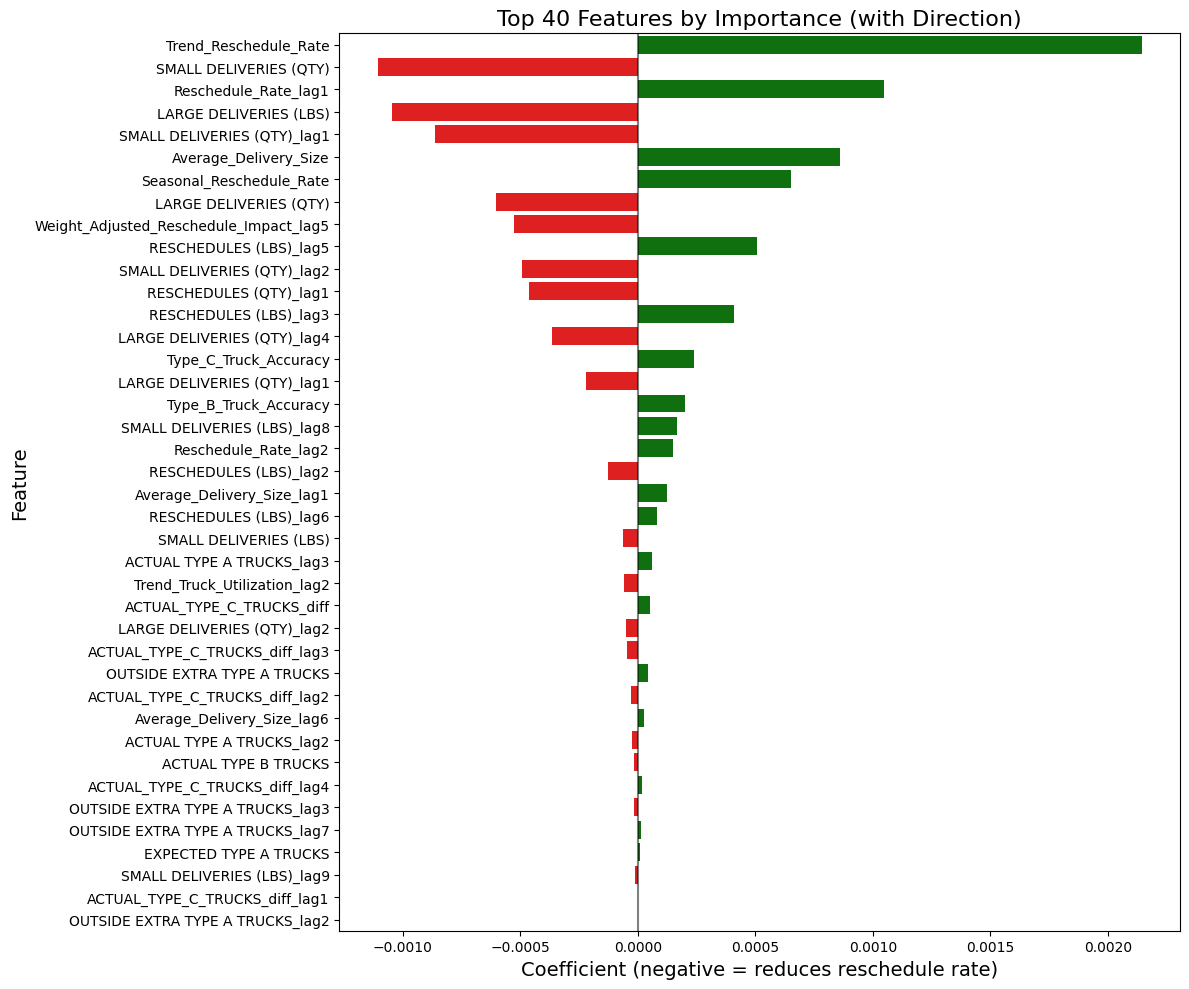

In [172]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Assuming df_model already has the differenced variables and lag features
# and NaN values have been dropped
# Drop variables if they exist in the DataFrame
columns_to_drop = ['Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Residual_Reschedule_Rate', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'EXPECTED TYPE C TRUCKS']
df_model = df_model.drop(columns=[col for col in columns_to_drop if col in df_model.columns])

# 1. Define target and features
y = df_model['Reschedule_Rate']

X = df_model.drop(columns=['Reschedule_Rate',])

# df_model.drop(columns=['Reschedule_Rate', 'Delivery_Fulfillment_Rate', 
                           #'Weight_Adjusted_Reschedule_Impact', 
                             #'Residual_Reschedule_Rate', 'Trend_Reschedule_Rate',
                             #'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'GASREGW', 'EXPECTED TYPE C TRUCKS', 'Seasonal_Reschedule_Rate',])

# 2. Scale the features (important for regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 3. Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# 4. Train ElasticNetCV with time series cross-validation
# l1_ratio=0.5 is a starting point (0=Ridge, 1=Lasso)
elastic_net = ElasticNetCV(
    l1_ratio=np.arange(0.05, 0.149, 0.001),
    alphas=np.logspace(-8, 1, 100),
    cv=tscv,
    max_iter=10000,
    random_state=42
)

# Fit the model
elastic_net.fit(X_scaled, y)

# 5. Extract feature importances (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elastic_net.coef_
})

# Sort by absolute coefficient value to see most important features
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# 6. Print model information
print(f"Best alpha: {elastic_net.alpha_}")
print(f"Best l1_ratio: {elastic_net.l1_ratio_}")
print(f"R² score: {elastic_net.score(X_scaled, y)}")
print("\nTop 10 important features:")
print(feature_importance.head(10))

# 8. Create a more detailed visualization showing coefficient signs
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(40)

# Use coefficient with sign for this plot
colors = ['red' if c < 0 else 'green' for c in top_features['Coefficient']]
ax = sns.barplot(x='Coefficient', y='Feature', data=top_features, palette=colors)
ax.set_title('Top 40 Features by Importance (with Direction)', fontsize=16)
ax.set_xlabel('Coefficient (negative = reduces reschedule rate)', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

Linear Regression MSE: 0.0000
Linear Regression R²: 0.2487


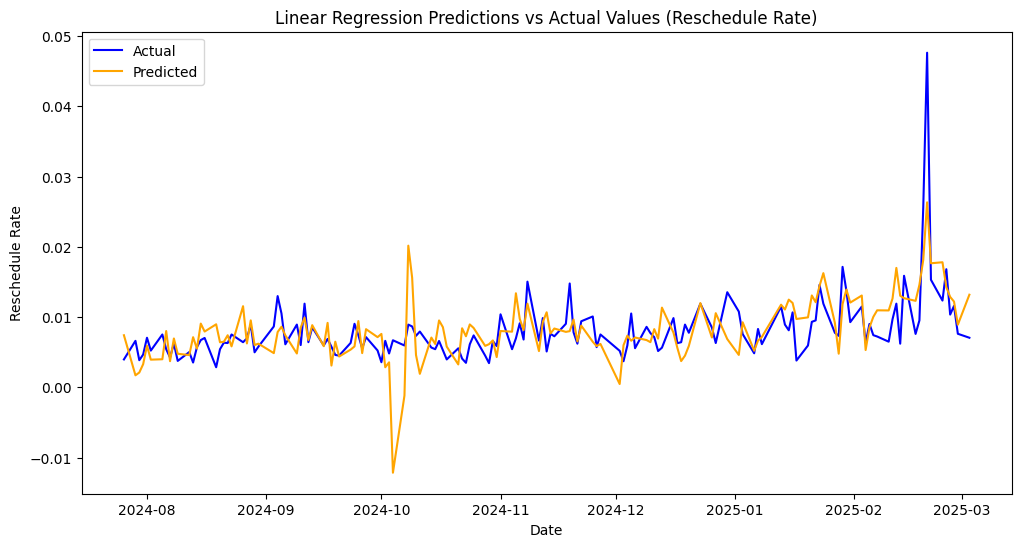

In [163]:
# Let's try running linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, shuffle=False)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on Reschedule_Rate
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R²: {r2:.4f}")

# Plotting the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Linear Regression Predictions vs Actual Values (Reschedule Rate)')
plt.xlabel('Date')
plt.ylabel('Reschedule Rate')
plt.legend()
plt.show()
